# **Telecom Company Customer Churn Prediction**



# 1 Introduction


## 1.1 Motivation

The telecom industry faces a significant challenge in retaining customers due to high churn rates. This issue poses a serious risk to telecom companies’ profitability and market position. Understanding the factors that contribute to customer churn and creating effective churn mitigation techniques are critical for a telecom company's long-term growth and profitability. As a result, the task at hand is to analyse and predict customer churn in the telecom business, with the goal of identifying key factors and developing predictive models to help the telecom company reduce churn and improve customer retention.

## 1.2 Objectives

*  The data mining goal is to develop a predictive model that accurately identifies customers who are more likely to churn. The target for this model is to achieve a minimum predictive accuracy of 85% and F1 score of 75% for the “Churned” class. A high accuracy indicates that the model is good at predicting the correct class for most of the data points while a high F1 score indicates a model that is both precise and has a good recall.
*  To evaluate the machine learning models using metrics such as precision, recall and F1-score.

# 2 Data

In [ ]:
import pandas as pd

customer_df = pd.read_csv("https://www.dropbox.com/s/wzvd5a1rrdull7a/telecom_customer_churn.csv?raw=1")
display(customer_df.head())

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

## 2.1 Data Description

The public dataset used in this research, which is a focus of the study, was sourced from Kaggle platform, although it is also accessible on Maven Analytics website platform. The dataset was chosen because it was relevant to the research objective and had the potential to provide useful insights regarding customer churn behaviour.

The dataset consists of three CSV-format tables. Two of these tables contain complimentary information, while the customer churn table contains information on all customers (7,043 records and 38 features) from a telecommunications company in California in Q2 2022. Each entry in the dataset represents a unique customer and includes various information such as demographics, customer account and services The target variable is “Customer Status,” which indicates whether a customer churned, stayed or joined.


## 2.2 Data Dictionary


| Attribute                            | Description                                               | Types  |
|--------------------------------------|-----------------------------------------------------------|--------|
| CustomerID                           | Unique customer ID                                        | String |
| Gender                               | Customer’s gender                                         | String |
| Age                                  | Customer’s current age at Q2 2022                         | Integer|
| Married                              | Customer’s marital status: Yes, No                                 | Boolean|
| Number of Dependents                 | Number of dependents that live with the customer           | Integer|
| City                                 | City in California where the customer resides              | String |
| Zip Code                             | Customer’s primary residence zip code                      | Integer|
| Latitude                             | Customer’s primary residence latitude                      | Float  |
| Longitude                            | Customer’s primary residence longitude                     | Float  |
| Number of Referrals                  | Number of times the customer referred a friend or family   | Integer|
| Tenure in Months                     | Customer’s total amount of months with the company         | Integer|
| Offer                                | Last marketing offer the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E                 | String |
| Phone Service                        | Customer’s subscription to home phone service: Yes, No              | Boolean|
| Avg. Monthly Long Distance Charges   | Customer’s average long-distance charges (if the customer is not subscribed to home phone service, this will be 0)                   | Float  |
| Multiple Lines                       | Customer’s subscription to multiple telephone lines (if the customer is not subscribed to home phone service, this will be No)        | Boolean|
| Internet Service                     | Customer’s subscription to internet service: Yes, No                | Boolean|
| Internet Type                        | Customer’s type of internet connection DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)                     | String |
| Avg. Monthly GB Download             | Customer’s average download volume in GB (if the customer is not subscribed to internet service, this will be 0)                   | Integer|
| Online Security                      | Customer’s subscription to additional service: Yes, No (if the customer is not subscribed to internet service, this will be No)              | Boolean|
| Online Backup                        | Customer’s subscription to additional service: Yes, No (if the customer is not subscribed to internet service, this will be No)              | Boolean|
| Device Protection Plan               | Customer’s subscription to additional service: Yes, No (if the customer is not subscribed to internet service, this will be No)              | Boolean|
| Premium Tech Support                 | Customer’s subscription to additional service: Yes, No (if the customer is not subscribed to internet service, this will be No)              | Boolean|
| Streaming TV                         | Free TV streaming via the company's internet service: Yes, No (if the customer is not subscribed to internet service, this will be No)       | Boolean|
| Streaming Movies                     | Free movies streaming via the company's internet service: Yes, No (if the customer is not subscribed to internet service, this will be No)   | Boolean|
| Streaming Music                      | Free music streaming via the company's internet service: Yes, No (if the customer is not subscribed to internet service, this will be No)    | Boolean|
| Unlimited Data                       | Paid unlimited data subscription: Yes, No (if the customer is not subscribed to internet service, this will be No)                           | Boolean|
| Contract                             | Customer’s current contract type: Month-to-Month, One Year, Two Year                           | String |
| Paperless Billing                    | Customer’s choice for paperless billing: Yes, No                    | Boolean|
| Payment Method                       | Customer’s method of payment: Bank Withdrawal, Credit Card, Mailed Check                               | String |
| Monthly Charge                       | Total monthly charge for all provided services             | Float  |
| Total Charges                        | Total charges for the quarter                              | Float  |
| Total Refunds                        | Total refunds for the quarter                              | Float  |
| Total Extra Data Charges             | Extra data charges for the quarter                         | Integer|
| Total Long Distance Charges          | Long distance charges for the quarter                      | Float  |
| Total Revenue                        | Total revenue from the customer for the quarter            | Float  |
| Customer Status                      | Status of customer at the end of the quarter: Churned, Stayed, or Joined               | String |
| Churn Category                       | High-level category for customer’s churning reason: Attitude, Competitor, Dissatisfaction, Other, Price (directly related to Churn Reason)         | String |
| Churn Reason                         | Customer’s specific reason for churning                    | String |


**Citation:** Zhuang, S.L., 2022. Telecom Customer Churn Prediction. [online]. Available from: https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics [Accessed 6 July 2023].

# 3 Exploratory Data Analysis

### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

## 3.1 Statistical Description

### 3.1.1 Data Validation

A. Validating Values and Data Types

In [ ]:
# Validatong data types
# Summary of 'customer_df'
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

**Key Observations**


*   The DataFrame contains 7043 entries (rows) and 38 columns.
*   All the features have the correct data types.

In [ ]:
# Checking for mssing values
customer_df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

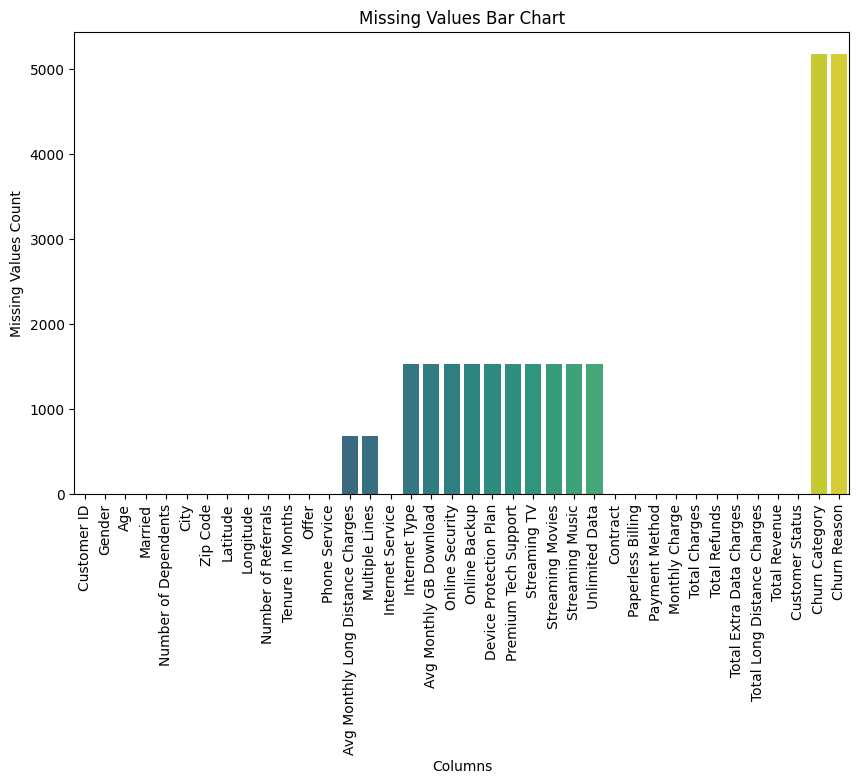

In [ ]:
# Calculate the missing values for each column
missing_values = customer_df.isna().sum()

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Bar Chart')
plt.show()

Several columns such as `Avg Monthly Long Distance Charges`, `Multiple Lines`, `Internet Type`, `Avg Monthly GB Download`, `Online Security` etc., have a significant number of missing values. Given that these features, except `Churn Category` and `Churn Reason`, are categorised under service information i.e., extra services, it is unsurprising to observe a significant number of missing values within them.

The `Churn Category` and `Churn Reason` columns have missing values, indicating that not all customers have churned.


In [ ]:
# Summary Statistics
customer_df.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

**Key Observation**


*   From the above result, it can be observed that the mean values of the features vary, indicating that the features have different magnitudes and scales. This can creäte challenges for certain machine learning algorithms like SVM, which assume that all features are equally important and have similar scales.


These features can be categorised into subgroups:

*   **Demographic information**: Gender, Age, Married, Number of Dependents, Zip code, City, Latitude, Longitude, Number of Referrals
*   **Customer account information**: Tenure in Months, Offer, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges, Internet Type, Avg Monthly Long Distance Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue
*   **Service information**: Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music




B. Validating Categorical Data

In [ ]:
# Select categorical columns
cat_cols = customer_df.select_dtypes("object")

# Select numeric columns
num_cols = customer_df.select_dtypes("number")

# Display categorical column titles and total
print("Categorical Columns:")
print(cat_cols.columns)
print("Total number of categorical columns: ", len(cat_cols.columns))
print()

# Display numerical column titles and total
print("Numeric Columns:")
print(num_cols.columns)
print("Total number of numerical columns: ", len(num_cols.columns))

Categorical Columns:
Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')
Total number of categorical columns:  23

Numeric Columns:
Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
Total number of numerical columns:  15


C. Validating the Consistency of Unique Values in Categorical Variables with the Data Dictionary

In [ ]:
# Calculate the number of unique values for each categorical column
n_unique_val = cat_cols.nunique()

# Create a dictionary to store the unique values for each column
unique_dict = {col: list(customer_df[col].unique()) for col in cat_cols}

# Calculate the mode for each categorical column
modes = cat_cols.mode().iloc[0]

# Create a new DataFrame with the number of unique values and their corresponding values
new_df = pd.DataFrame({'Unique Values': n_unique_val,
                       'Values': [str(unique_dict[col]) for col in cat_cols],
                       'Mode': [modes[col] for col in cat_cols]})

# Display the new DataFrame
display(new_df)

Unique Values  \
Customer ID                      7043   
Gender                              2   
Married                             2   
City                             1106   
Offer                               6   
Phone Service                       2   
Multiple Lines                      2   
Internet Service                    2   
Internet Type                       3   
Online Security                     2   
Online Backup                       2   
Device Protection Plan              2   
Premium Tech Support                2   
Streaming TV                        2   
Streaming Movies                    2   
Streaming Music                     2   
Unlimited Data                      2   
Contract                            3   
Paperless Billing                   2   
Payment Method                      3   
Customer Status                     3   
Churn Category                      5   
Churn Reason                       20   

                                                                   Values  \
Customer ID             ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '00...   
Gender                                                 ['Female', 'Male']   
Married                                                     ['Yes', 'No']   
City                    ['Frazier Park', 'Glendale', 'Costa Mesa', 'Ma...   
Offer                   ['None', 'Offer E', 'Offer D', 'Offer A', 'Off...   
Phone Service                                               ['Yes', 'No']   
Multiple Lines                                         ['No', 'Yes', nan]   
Internet Service                                            ['Yes', 'No']   
Internet Type                        ['Cable', 'Fiber Optic', 'DSL', nan]   
Online Security                                        ['No', 'Yes', nan]   
Online Backup                                          ['Yes', 'No', nan]   
Device Protection Plan                                 ['No', 'Yes', nan]   
Premium Tech Support                                   ['Yes', 'No', nan]   
Streaming TV                                           ['Yes', 'No', nan]   
Streaming Movies                                       ['No', 'Yes', nan]   
Streaming Music                                        ['No', 'Yes', nan]   
Unlimited Data                                         ['Yes', 'No', nan]   
Contract                       ['One Year', 'Month-to-Month', 'Two Year']   
Paperless Billing                                           ['Yes', 'No']   
Payment Method          ['Credit Card', 'Bank Withdrawal', 'Mailed Che...   
Customer Status                           ['Stayed', 'Churned', 'Joined']   
Churn Category          [nan, 'Competitor', 'Dissatisfaction', 'Other'...   
Churn Reason            [nan, 'Competitor had better devices', 'Produc...   

                                                 Mode  
Customer ID                                0002-ORFBO  
Gender                                           Male  
Married                                            No  
City                                      Los Angeles  
Offer                                            None  
Phone Service                                     Yes  
Multiple Lines                                     No  
Internet Service                                  Yes  
Internet Type                             Fiber Optic  
Online Security                                    No  
Online Backup                                      No  
Device Protection Plan                             No  
Premium Tech Support                               No  
Streaming TV                                       No  
Streaming Movies                                   No  
Streaming Music                                    No  
Unlimited Data                                    Yes  
Contract                               Month-to-Month  
Paperless Billing                                 Yes  
Payment Method                        Bank Withdrawal  
Customer Statu

**Key Observations**

*  The `nan` values were expected as these are features with missing values.
*  The unique values of the categorical variables are consistent with the data dictionary

### 3.1.2 Univariate Analysis

A. Distribution of Categorical Data

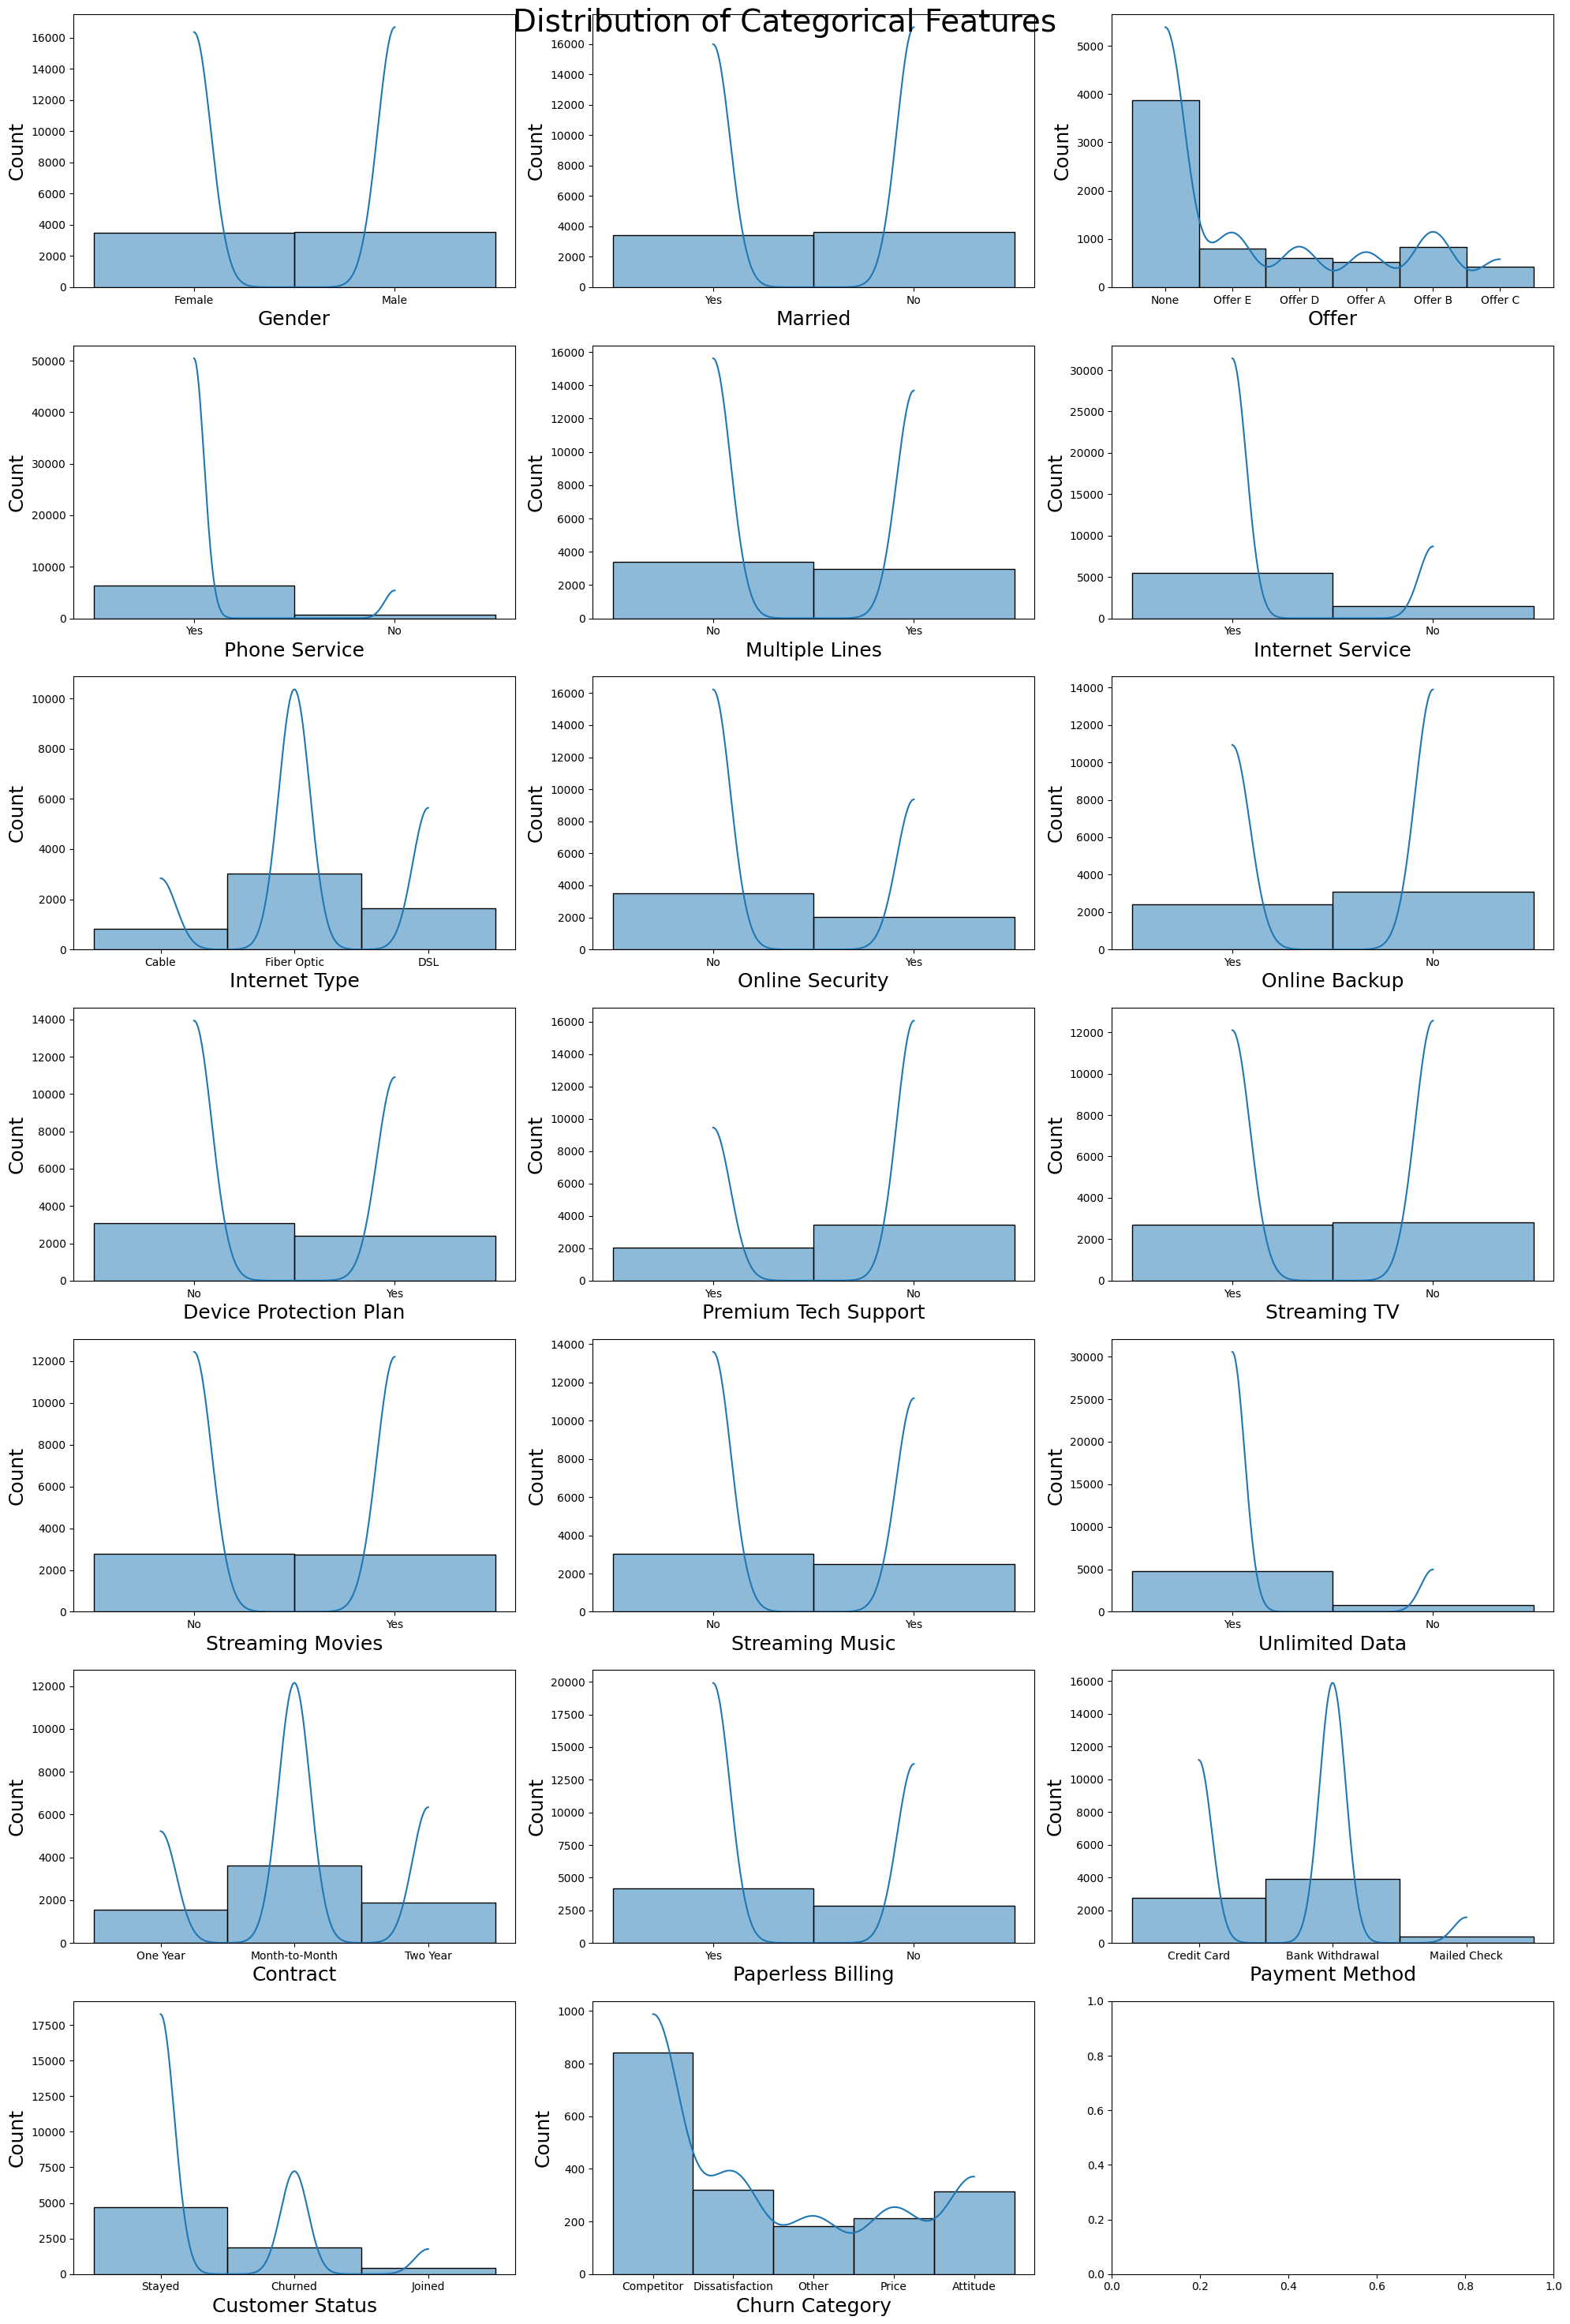

In [ ]:
# Select the features to plot by dropping unwanted features
dist_cat_cols = cat_cols.drop(['Customer ID', 'City', 'Churn Reason'], axis=1)

# Set the figure size and layout
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))
axes = axes.flatten()

# Plot the distribution of each column
for i, col in enumerate(dist_cat_cols):
    sns.histplot(data=customer_df, x=col, kde=True, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=18)
    axes[i].set_ylabel('Count', fontsize=18)

# Add titles and adjust spacing
plt.suptitle('Distribution of Categorical Features', fontsize=28)
plt.tight_layout()
plt.show()


**Key Observations**

*  Many of the features have right skewed distribution.
*  `Contract Type` and `Internet Type` have no skew.
*  The class distribution of the target variable, `Customer Status,` is imbalanced, meaning that the number of instances in each class is not evenly distributed.

B. Distribution of Numerical Data

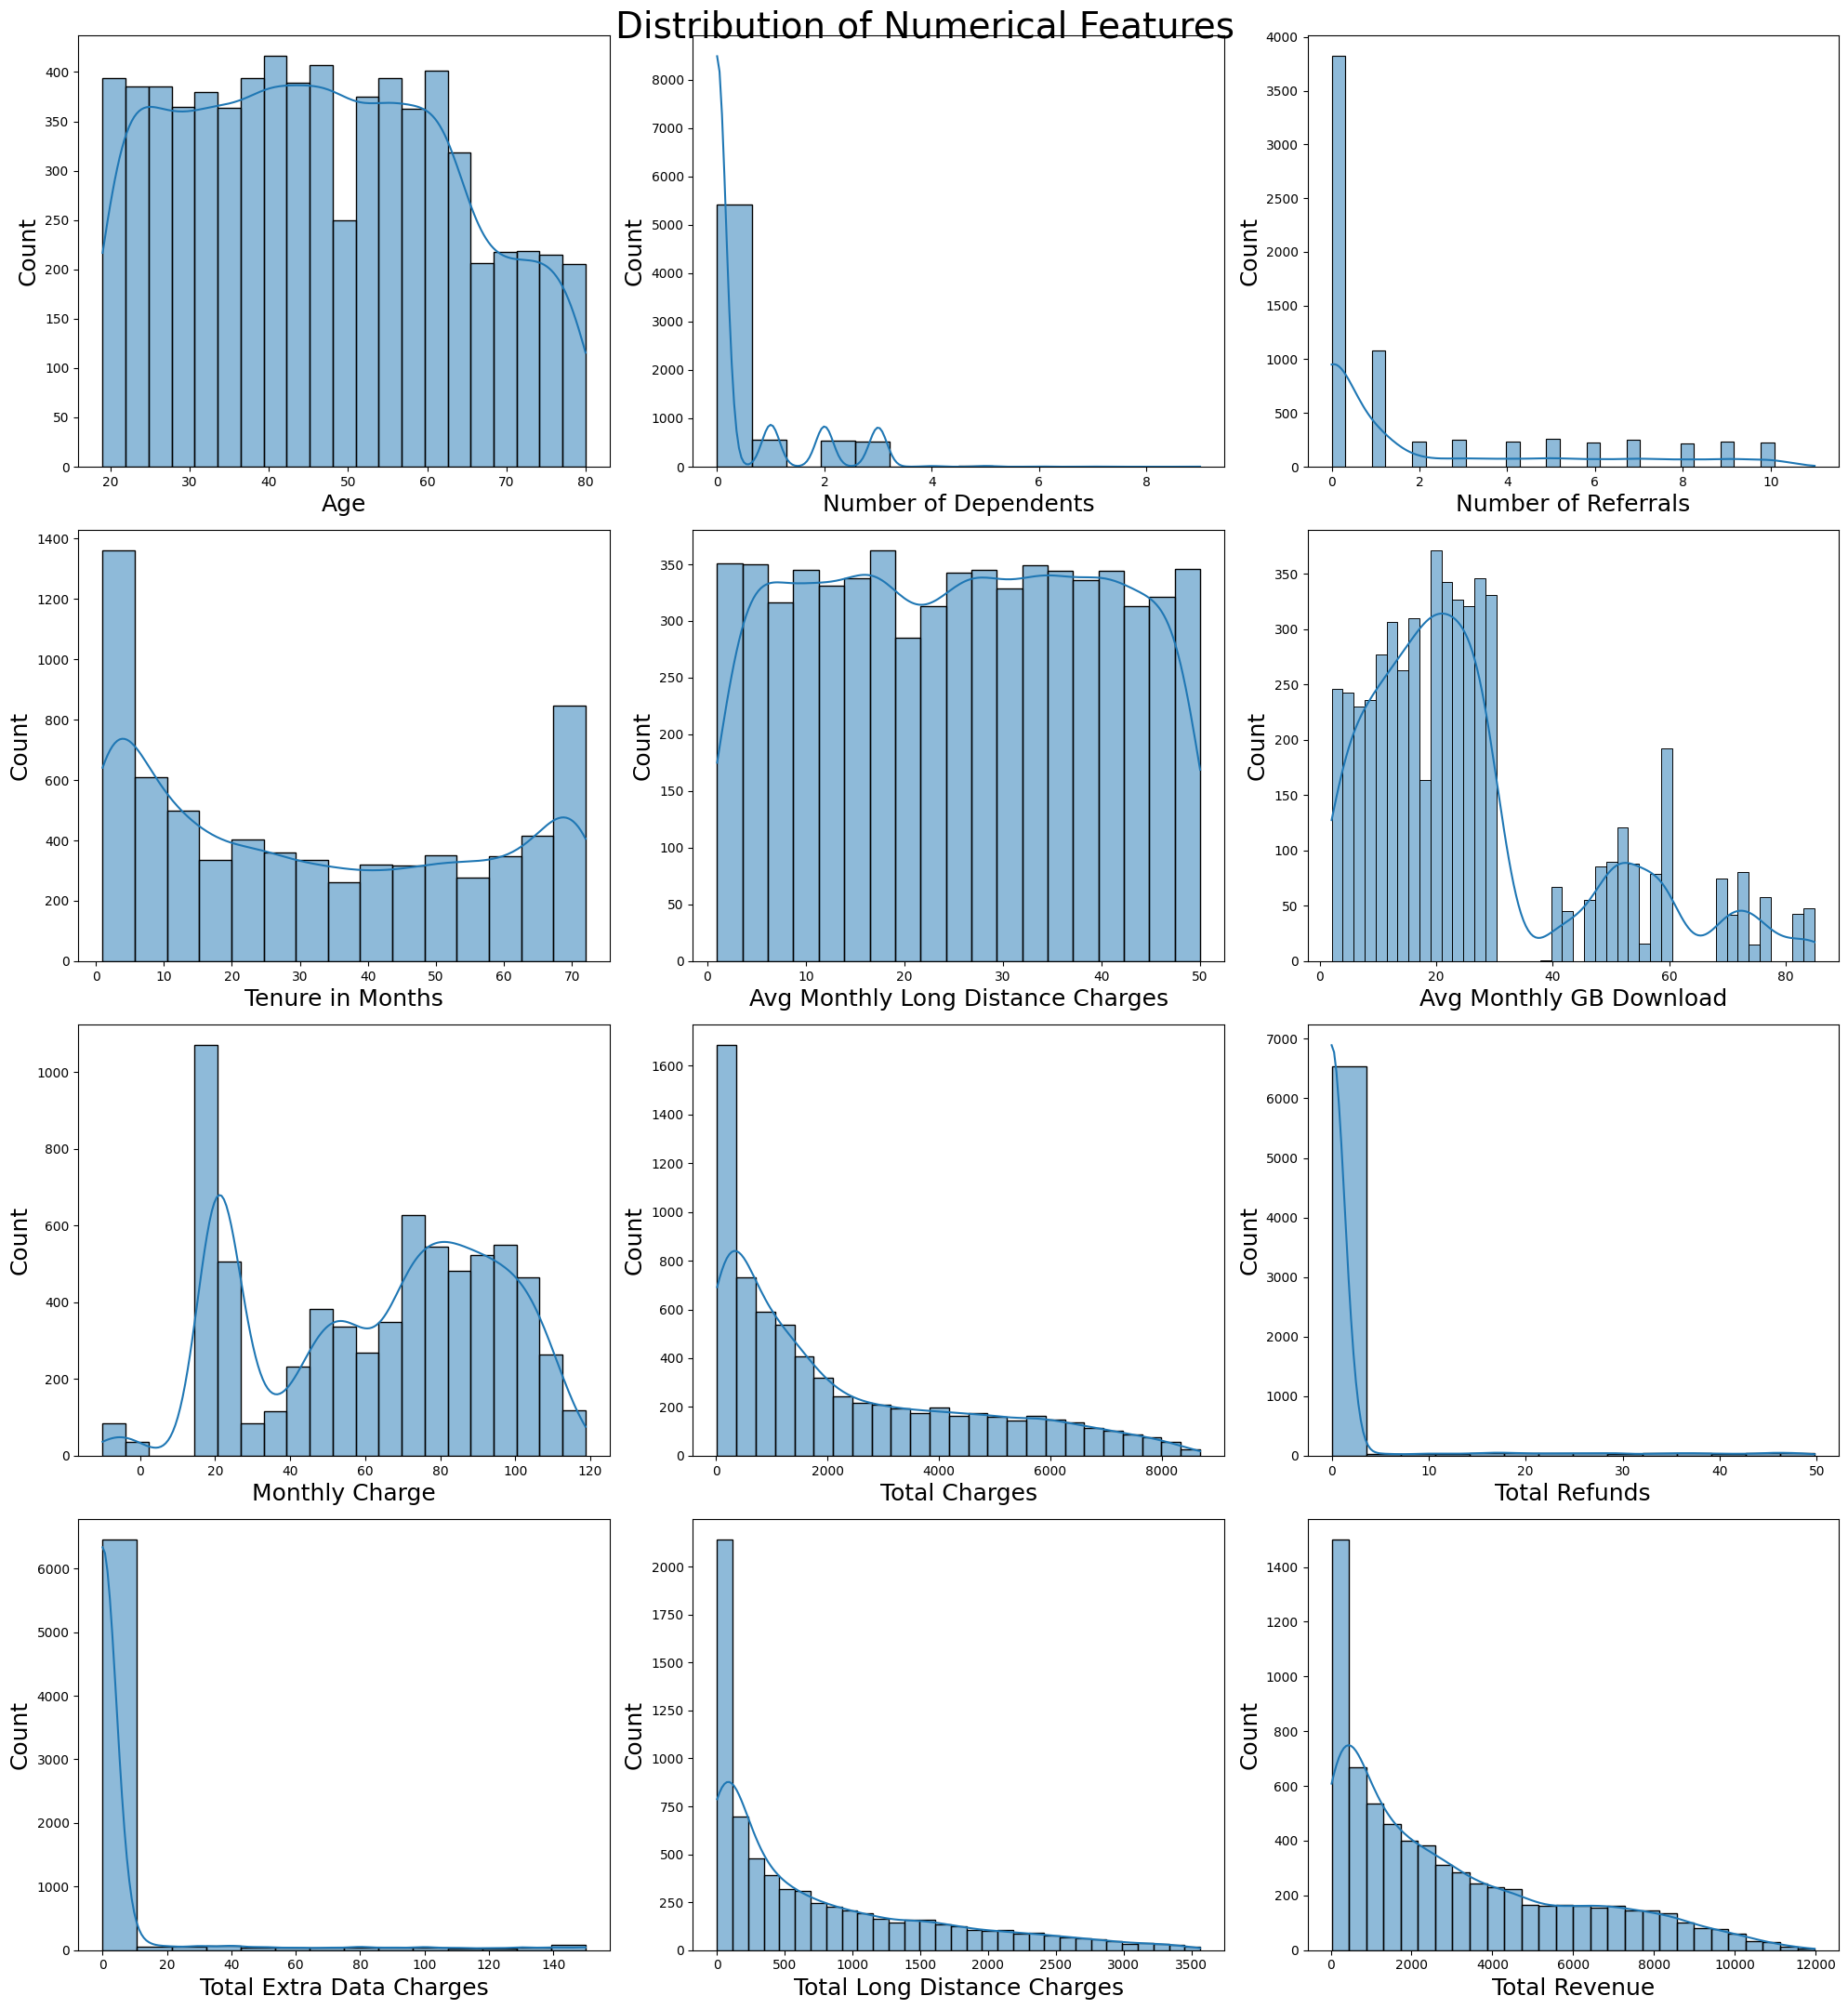

In [ ]:
# Select the features to plot by dropping unwanted features
dist_num_cols = num_cols.drop(['Zip Code', 'Latitude', 'Longitude'], axis=1)

# Set the figure size and layout
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 22))
axes = axes.flatten()

# Plot the distribution of each column
for i, col in enumerate(dist_num_cols):
    sns.histplot(data=customer_df, x=col, kde=True, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=18)
    axes[i].set_ylabel('Count', fontsize=18)

# Add titles and adjust spacing
plt.suptitle('Distribution of Numerical Features', fontsize=28)
plt.tight_layout()
plt.show()

**Key Observations**

*  The distribution of `Monthly Charge` includes instances where a zero value is observed, indicating the absence of any monthly charges.
*  Many of the features have right skewed distribution.
*  The telecom company has a relatively smaller customer base comprising individuals aged 65 and above.
*  A significant number of customers churned or discontinued their services with the company within the initial 5-month period.

C. Target Feature - Customer Status

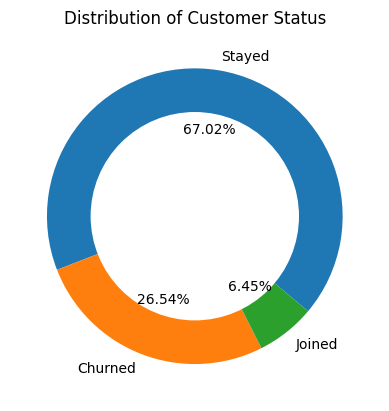

In [ ]:
# Compute the value counts of each category in the 'Customer Status' column
status_counts = customer_df['Customer Status'].value_counts()
total_customers = len(customer_df)

# Calculate the percentage of each category
status_pct = status_counts / total_customers * 100

# Create a donut chart
plt.pie(status_counts, labels=status_pct.index, autopct='%1.2f%%',
        wedgeprops=dict(width=0.5), startangle=-40)

# Draw a white circle at the center to create a donut chart effect
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

# Adding title
plt.title('Distribution of Customer Status')

plt.show()


**Key Observation**

The analysis reveals a noticeable class imbalance within the target feature `Customer Status`, where the majority of customers tend to not churn compared to those who churned. This poses a challenge during the modeling phase, as machine learning algorithms often prioritise accuracy and may exhibit a bias towards the majority class. To tackle this issue, it is essential to employ resampling techniques like oversampling or undersampling to achieve a balanced representation of the classes within the training data. By doing so, we can mitigate the potential bias and enhance the model's ability to accurately learn from both class instances.

D. Contract

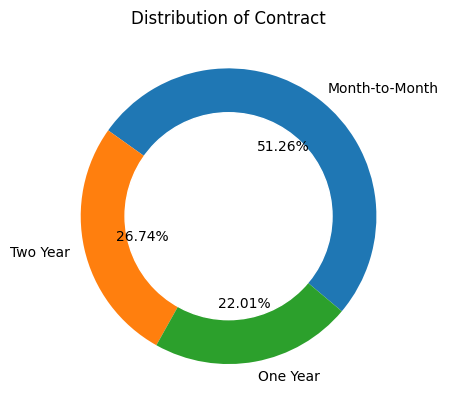

In [ ]:
# Compute the value counts of each category in the 'Customer Status' column
contract_counts = customer_df['Contract'].value_counts()
total_contracts = len(customer_df)

# Calculate the percentage of each category
contract_pct = contract_counts / total_contracts * 100

# Create a donut chart
plt.pie(contract_counts, labels=contract_pct.index, autopct='%1.2f%%',
        wedgeprops=dict(width=0.5), startangle=-40)

# Draw a white circle at the center to create a donut chart effect
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

# Adding title
plt.title('Distribution of Contract')

plt.show()

**Key Observation**

Based on the analysis, it can be inferred that a significant portion of the customer base prefers the flexibility of a `Month-to-Month` contract. This suggests that these customers may value the ability to adjust or cancel their services on a monthly basis. On the other hand, the percentage of customers on longer-term contracts (`One-Year` or `Two-Year`) is lower, indicating that a smaller portion of the customer base prefers a longer commitment.

E. Churn Category

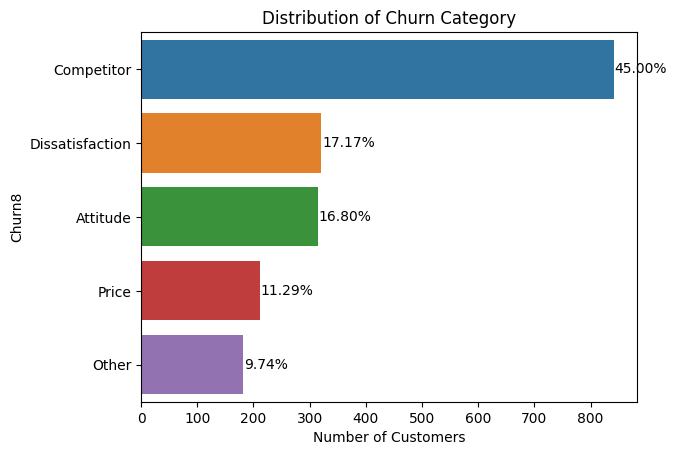

In [ ]:
# Count the occurrences of each churn category
churn_counts = customer_df["Churn Category"].value_counts()

# Calculate the percentage of each churn category
churn_pct = churn_counts / churn_counts.sum() * 100

# Plot the barplot of churn category and assign it to ax
ax = sns.barplot(x=churn_counts, y=churn_counts.index)

# Adding labels and title
plt.xlabel("Number of Customers")
plt.ylabel("Churn8")
plt.title("Distribution of Churn Category")

# Add percentage labels to the bars
for i, pct in enumerate(churn_pct):
    ax.text(churn_counts[i] + 2, i, f'{pct:.2f}%', va='center')

# Display the plot
plt.show()


**Key Observations**

The distribution suggests that a significant number of customers churned due to the presence of competitor(s) offering better services or more attractive offers. Competitor-related factors seem to have a major impact on customer churn.

### 3.1.3 Multivariate Analysis

A. Relationship between Age and Customer Status

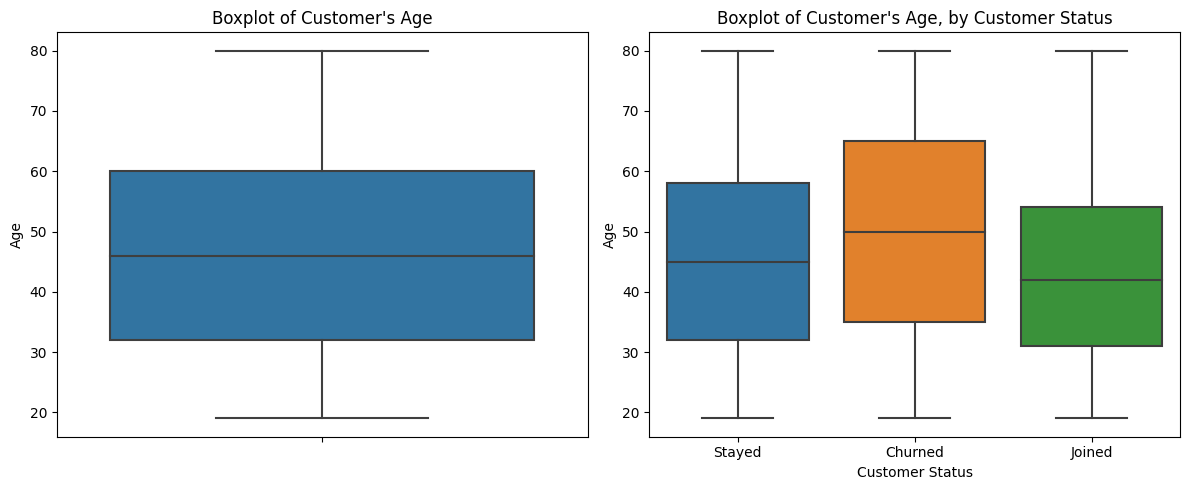

In [ ]:
# Set up of the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot of Customer's age on the first subplot
sns.boxplot(data=customer_df, y='Age', ax=axes[0])
axes[0].set_title("Boxplot of Customer's Age")

# Boxplot of Customer's 'Age', broken down by 'Customer Status' on the second subplot
sns.boxplot(data=customer_df, x='Customer Status', y='Age', ax=axes[1])
axes[1].set_title("Boxplot of Customer's Age, by Customer Status")

# Adjustment of the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Key Observations**



*   The `Customer Status` all have the same range based on the entire dataset, which means that the spread or variability of the data for `Stayed`, `Churned` and `Joined` are all similar. On the other hand, based on the Interquartile Range (IQR), the spread of the middle 50% is largest in `Churned` status meaning that it has the overall largest spread.
*   The `Churned` category holds the highest median age among `customer status`. This implies that the customers who have `churned` tend to be older compared to customers who `stayed` or `joined`. Few potential implications include:

  1.   changing preferences and requirements among older customers may have led to increased churn rates in this age group.
  2.   the offerings, pricing, or overall customer experience may not be compelling enough to retain this age group. For instance, older individuals typically show lesser concern regarding data offerings in comparison to younger individuals.



B. Relationship between Contract Type and Customer Status

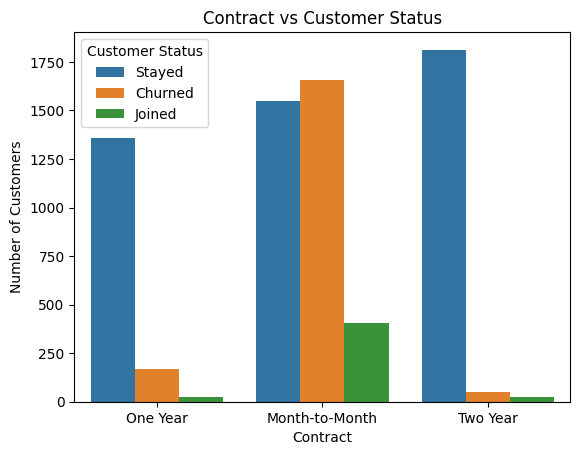

In [ ]:
# Plotting the chart
sns.countplot(data=customer_df, x='Contract', hue='Customer Status')

# Adding labels and title
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.title('Contract vs Customer Status')

# Adding a legend
plt.legend(title='Customer Status')

# Display the plot
plt.show()

In [ ]:
# Creating a cross-tabulation of 'Contract' and 'Customer Status'
cross_tab = pd.crosstab(customer_df['Contract'], customer_df['Customer Status'])

# Display croos tab
display(cross_tab)

Customer Status  Churned  Joined  Stayed
Contract                                
Month-to-Month      1655     408    1547
One Year             166      24    1360
Two Year              48      22    1813

**Key Observations**


*  It can be observed that a significant number of customers who churned are on a `Month-to-Month` contract. This suggests that customers on this type of contract may be more prone to churning, potentially due to the flexibility it offers, allowing them to easily switch providers or cancel their services.
*  The majority of customers who `stayed` are on a `Two Year` contract. This implies that customers who commit to a longer-term contract may be more likely to remain loyal and continue their services. The lower number of customers who churned on this contract type indicates that a longer contract duration may contribute to customer retention.

C. Relationship between Number of Referrals and Customer Status

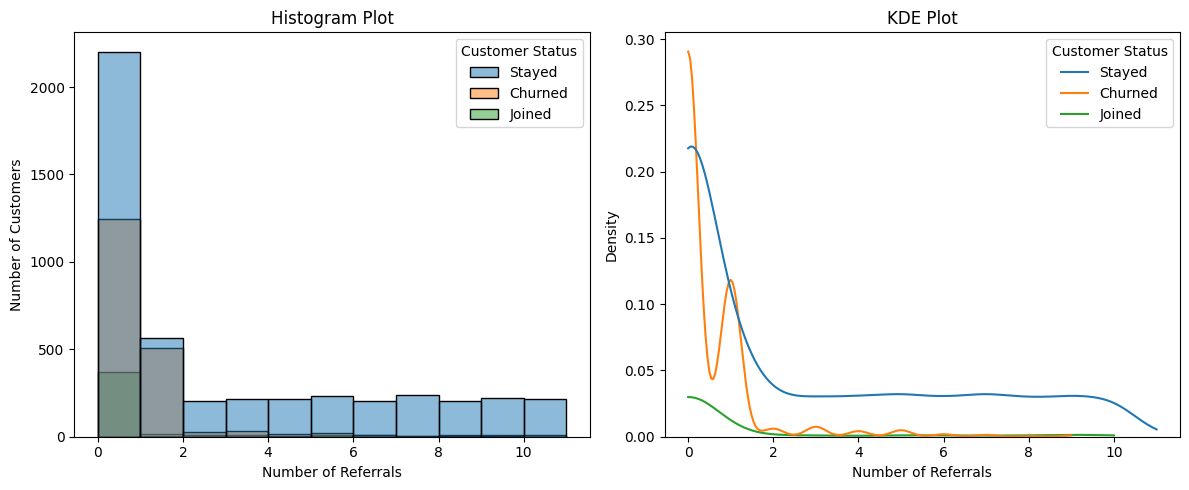

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histplot on the first subplot
sns.histplot(data=customer_df, x="Number of Referrals", hue="Customer Status", binwidth=1, ax=axes[0])
axes[0].set_title('Histogram Plot')
axes[0].set_ylabel('Number of Customers')  # Set the y-label

# Plot kdeplot on the second subplot
sns.kdeplot(data=customer_df, x="Number of Referrals", hue="Customer Status", cut=0, ax=axes[1])
axes[1].set_title('KDE Plot')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

The `Customer Status` are stacked on top of one another however, the relationship between `Number of Referrals` and `Customer Status` is not super clear. Therefore, a Kernel Density Estimate (KDE) plot is utilised to visualise the distributions effectively.

**Key Observation**

It can be seen that as the `Number of Referrals` increases, the number of customers who churn reduces. This suggests a positive correlation between the number of referrals and customer retention.

Referrals can help with customer retention by indicating customer satisfaction and the desire to promote the service to others. Customers referring others to the company may indicate a significant positive experience and brand loyalty.

D. Relationship between Offer and Customer Status

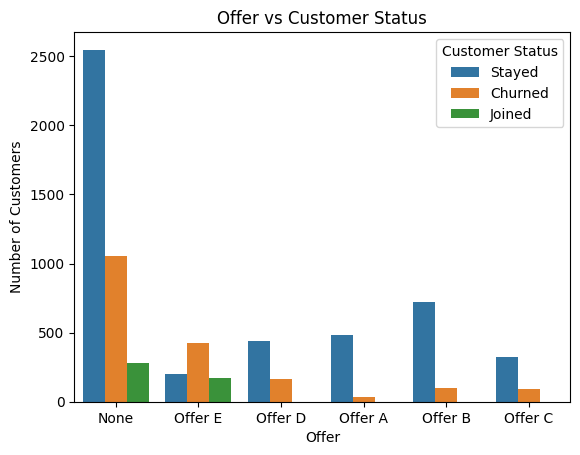

In [ ]:
# Plotting the chart
sns.countplot(data=customer_df, x='Offer', hue='Customer Status')

# Adding labels and title
plt.xlabel('Offer')
plt.ylabel('Number of Customers')
plt.title('Offer vs Customer Status')

# Adding a legend
plt.legend(title='Customer Status')

# Display the plot
plt.show()

**Key Observations**

*  Among the different offers, `Offer E` has the highest number of customers who churned. Additionally, it has the least number of customers who stayed and it is the only offer that encouraged customers to join.


This suggests that despite attracting new customers, `Offer E` has a greater churn rate and lower customer retention than the other offers. It is possible that the nature of offer E, while initially appealing, fails to match the customers' expectations or demands, resulting in dissatisfaction and eventual churn.

*  It is observed that `Offer B` has a higher number of customers who stay compared to other offers. This indicates that Offer B is more successful in retaining customers, as they are less likely to churn.

E. Relationship between Location and Customer Status

In [ ]:
# This will show a dot for every location in the dataset
fig = px.scatter_mapbox(customer_df,
                        lat="Latitude",
                        lon="Longitude",
                        size_max=10,
                        color='Customer Status',
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        width=1200,
                        height=550,
                        zoom=3,
                        hover_data={'City': True,
                                    'Customer Status': True,
                                    'Latitude': False, 'Longitude': False},
                        title='Customer Status Location)')

# Sets the map style of the figure to OpenStreetMap.
fig.update_layout(
    mapbox_style="open-street-map")

# Sets the margin of the figure to zero on all four sides: right, top, left, and bottom.
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show()


**Key Observation**

The relationship between location and churn behaviour appears to be generally unclear, except for the notable observation that a considerable number of new customers mostly originates from a part of northern and southern California.

F. Relationship among Monthly Charge, Total Charge and Customer Status

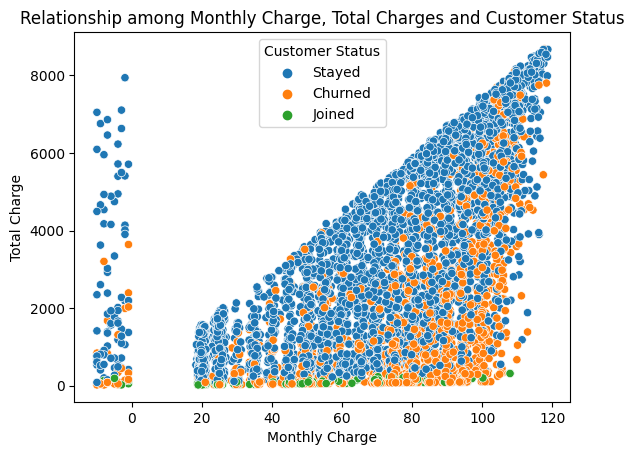

In [ ]:
# Create the scatter plot
sns.scatterplot(data=customer_df, x='Monthly Charge', y='Total Charges',
                hue='Customer Status')

# Adding labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charge')
plt.title('Relationship among Monthly Charge, Total Charges and Customer Status')

# Display the plot
plt.show()

**Key Observations**


*   It can be seen from the plot that a significant number of customers churned when their `Monthly Charge` exceeded approximately $70. This suggests that there may be a threshold beyond which customers are less willing to tolerate price increases and are more likely to churn.
*   On the other hand, it is also noticeable that despite high `Total Charges`, many more customers stayed. This indicates that customers are willing to continue their services even when the overall cost is high, potentially because they perceive value in the service or have established loyalty to the provider.



## 3.2 Correlation

Correlation Coefficients Between Different Numerical Features

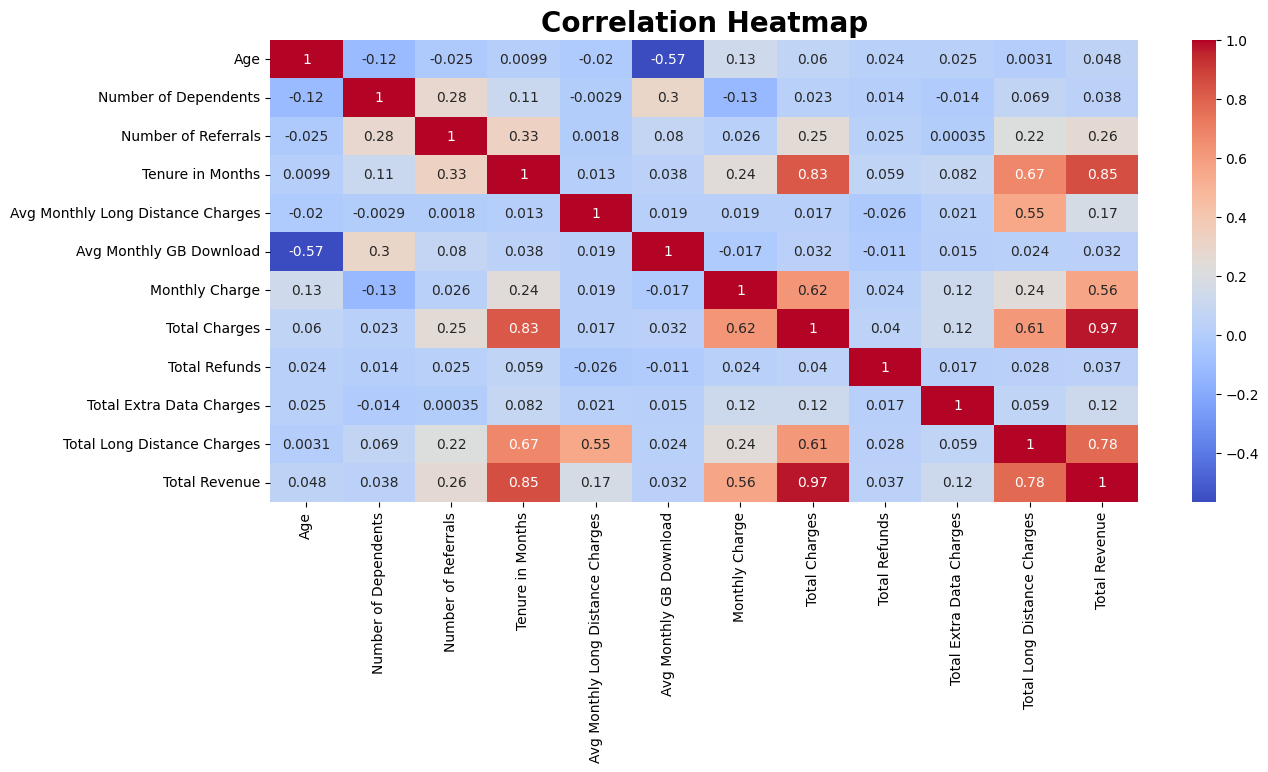

In [ ]:
# Set the size of the heatmap figure
plt.figure(figsize=(14, 6))

# Creating the correlation heatmap using the correlation matrix of numerical columns
sns.heatmap(data=dist_num_cols.corr(), annot=True, cmap='coolwarm')

# Adding a title to the heatmap with specified font size and weight
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')

# Display the heatmap
plt.show()

**Key Observation**

Pairs of features that exhibit a strong positive correlation include `Tenure in Months` with `Total Charges,` `Total Long Distance Charges,` and `Total Revenue`. This alignment is logical since an extended tenure typically corresponds to higher cumulative charges accrued.

# 4. Data Preprocessing
## 4.1 Data Cleaning
### 4.1.1 Addressing Missing Values

In [ ]:
# Counting the number of missing values in each column
print(customer_df.isna().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

**Commentary**

According to the data dictionary, if the customer is not subscribed to home phone service (Yes /No), the value for `Avg Monthly Long Distance Charges` will be `0`.
*  The same principle applies to the `Internet Service` and `Avg Monthly GB Download`colunms.
*  Also applies to the `Phone Service` and `Multiple Lines` (`No` in this instance) columns.
*   Applies to the `Internet Service` and `Online Security`, `Online Backup`, `Device Protection Plan`, `Premium Tech Support`, `Streaming TV`, `Streaming Movies`, `Streaming Music`, `Unlimited Data` columns. The values in this instances will be `No`.
*  Applies to the `Internet Service` and `Internet Type` (`None` in this instance).

Hence, the situation requires further investigation.

In [ ]:
# Filtering and summing 'Avg Monthly Long Distance Charges' where 'Phone Service' is 'No'
filtered_df1_total = customer_df.loc[customer_df["Phone Service"] == "No",
                                     "Avg Monthly Long Distance Charges"].isna().sum()
print(f"Total NaN values in 'Avg Monthly Long Distance Charges' is: {filtered_df1_total}")

# Filtering and summing 'Avg Monthly GB Download' where 'Internet Service' is 'No'
filtered_df2_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                     "Avg Monthly GB Download"].isna().sum()
print(f"Total NaN values in 'Avg Monthly GB Download' is: {filtered_df2_total}")

# Filtering and summing 'Multiple Lines' where 'Phone Service' is 'No'
filtered_df3_total = customer_df.loc[customer_df["Phone Service"] == "No",
                                     "Multiple Lines"].isna().sum()
print(f"Total NaN values in 'Multiple Lines' is: {filtered_df3_total}")

# Filtering and summing 'Online Security' where 'Internet Service' is 'No'
filtered_df4_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                     "Online Security"].isna().sum()
print(f"Total NaN values in 'Online Security' is: {filtered_df4_total}")

# Filtering and summing 'Online Backup' where 'Internet Service' is 'No'
filtered_df5_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                     "Online Backup"].isna().sum()
print(f"Total NaN values in 'Online Backup' is: {filtered_df5_total}")

# Filtering and summing 'Device Protection Plan' where 'Internet Service' is 'No'
filtered_df6_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                     "Device Protection Plan"].isna().sum()
print(f"Total NaN values in 'Device Protection Plan' is: {filtered_df6_total}")

# Filtering and summing 'Premium Tech Support' where 'Internet Service' is 'No'
filtered_df7_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                     "Premium Tech Support"].isna().sum()
print(f"Total NaN values in 'Premium Tech Support' is: {filtered_df7_total}")

# Filtering and summing 'Streaming TV' where 'Internet Service' is 'No'
filtered_df8_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                     "Streaming TV"].isna().sum()
print(f"Total NaN values in 'Streaming TV' is: {filtered_df8_total}")

# Filtering and summing 'Streaming Movies' where 'Internet Service' is 'No'
filtered_df9_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                     "Streaming Movies"].isna().sum()
print(f"Total NaN values in 'Streaming Movies' is: {filtered_df9_total}")

# Filtering and summing 'Streaming Music' where 'Internet Service' is 'No'
filtered_df10_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                      "Streaming Music"].isna().sum()
print(f"Total NaN values in 'Streaming Music' is: {filtered_df10_total}")

# Filtering and summing 'Unlimited Data' where 'Internet Service' is 'No'
filtered_df11_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                      "Unlimited Data"].isna().sum()
print(f"Total NaN values in 'Unlimited Data' is: {filtered_df11_total}")

# Filtering and summing 'Internet Type' where 'Internet Service' is 'No'
filtered_df12_total = customer_df.loc[customer_df["Internet Service"] == "No",
                                      "Internet Type"].isna().sum()
print(f"Total NaN values in 'Internet Type' is: {filtered_df12_total}")

Total NaN values in 'Avg Monthly Long Distance Charges' is: 682
Total NaN values in 'Avg Monthly GB Download' is: 1526
Total NaN values in 'Multiple Lines' is: 682
Total NaN values in 'Online Security' is: 1526
Total NaN values in 'Online Backup' is: 1526
Total NaN values in 'Device Protection Plan' is: 1526
Total NaN values in 'Premium Tech Support' is: 1526
Total NaN values in 'Streaming TV' is: 1526
Total NaN values in 'Streaming Movies' is: 1526
Total NaN values in 'Streaming Music' is: 1526
Total NaN values in 'Unlimited Data' is: 1526
Total NaN values in 'Internet Type' is: 1526


The result matches the number of previously detected missing values, indicating that the `NaN` values should have been filled with `0`, `No` or `None` depending on the specific circumstances.

Also, `Churn Category` and `Churn Reason` will be dropped as they represent additional information.

In [ ]:
# Replacing 'NaN' values with "0", "No" or "None" in the specified columns
customer_df["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)
customer_df["Avg Monthly GB Download"].fillna(0, inplace=True)
customer_df["Multiple Lines"].fillna("No", inplace=True)
customer_df["Online Security"].fillna("No", inplace=True)
customer_df["Online Backup"].fillna("No", inplace=True)
customer_df["Device Protection Plan"].fillna("No", inplace=True)
customer_df["Premium Tech Support"].fillna("No", inplace=True)
customer_df["Streaming TV"].fillna("No", inplace=True)
customer_df["Streaming Movies"].fillna("No", inplace=True)
customer_df["Streaming Music"].fillna("No", inplace=True)
customer_df["Unlimited Data"].fillna("No", inplace=True)
customer_df["Internet Type"].fillna("None", inplace=True)

In [ ]:
# Dropping the "Churn Category" and "Churn Reason" columns
customer_df.drop(["Churn Category", "Churn Reason"], axis=1, inplace=True)

# Checking the number of missing values again
print(customer_df.isna().sum())

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

### 4.1.2 Identifying Outliers Using Interquartile Range (IQR)

In [ ]:
# Summary statistics of relevant features
stats_before_removal = customer_df.drop(['Zip Code', 'Latitude', 'Longitude'], axis=1).describe()
display(stats_before_removal)

Age  Number of Dependents  Number of Referrals  \
count  7043.000000           7043.000000          7043.000000   
mean     46.509726              0.468692             1.951867   
std      16.750352              0.962802             3.001199   
min      19.000000              0.000000             0.000000   
25%      32.000000              0.000000             0.000000   
50%      46.000000              0.000000             0.000000   
75%      60.000000              0.000000             3.000000   
max      80.000000              9.000000            11.000000   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count       7043.000000                        7043.000000   
mean          32.386767                          22.958954   
std           24.542061                          15.448113   
min            1.000000                           0.000000   
25%            9.000000                           9.210000   
50%           29.000000                          22.890000   
75%           55.000000                          36.395000   
max           72.000000                          49.990000   

       Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
count              7043.000000     7043.000000    7043.000000    7043.000000   
mean                 20.515405       63.596131    2280.381264       1.962182   
std                  20.418940       31.204743    2266.220462       7.902614   
min                   0.000000      -10.000000      18.800000       0.000000   
25%                   3.000000       30.400000     400.150000       0.000000   
50%                  17.000000       70.050000    1394.550000       0.000000   
75%                  27.000000       89.750000    3786.600000       0.000000   
max                  85.000000      118.750000    8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
count               7043.000000                  7043.000000    7043.000000  
mean                   6.860713                   749.099262    3034.379056  
std                   25.104978                   846.660055    2865.204542  
min                    0.000000                     0.000000      21.360000  
25%                    0.000000                    70.545000     605.610000  
50%                    0.000000                   401.440000    2108.640000  
75%                    0.000000                  1191.100000    4801.145000  
max                  150.000000                  3564.720000   11979.340000

In [ ]:
# Identifying thresholds for numerical columns excluding specified columns
for column in customer_df:
    if customer_df[column].dtype in [int, float]:
      # Calculating the 75th percentiles for each column
      upper_perc = customer_df[column].quantile(0.75)
      # Calculating the  25th percentiles for each column
      lower_perc = customer_df[column].quantile(0.25)

      # Calculating IQR for each column
      iqr = upper_perc - lower_perc

      # Calculating the thresholds
      upper_threshold = upper_perc + (1.5 * iqr)
      lower_threshold = lower_perc - (1.5 * iqr)

      # Removing outliers from 'customer_df'
      no_outliers_df = customer_df[(customer_df[column] > lower_threshold) &
      (customer_df[column] < upper_threshold)]

# Displaying result
stats_after_removal = no_outliers_df.describe()
display(stats_after_removal)

Age  Number of Dependents      Zip Code     Latitude  \
count  7022.000000           7022.000000   7022.000000  7022.000000   
mean     46.502136              0.469240  93485.184705    36.195560   
std      16.749865              0.963429   1857.532995     2.469116   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.989524   
50%      46.000000              0.000000  93517.000000    36.186867   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7022.000000          7022.000000       7022.000000   
mean   -119.753824             1.947024         32.269012   
std       2.154069             2.996943         24.483919   
min    -124.301372             0.000000          1.000000   
25%    -121.785559             0.000000          9.000000   
50%    -119.593757             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7022.000000              7022.000000   
mean                           22.892914                20.515807   
std                            15.422432                20.434769   
min                             0.000000                 0.000000   
25%                             9.190000                 3.000000   
50%                            22.830000                17.000000   
75%                            36.277500                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7022.000000    7022.000000    7022.000000               7022.000000   
mean        63.445863    2262.621659       1.967276                  6.832811   
std         31.129531    2246.135985       7.913621                 25.041091   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.312500     398.550000       0.000000                  0.000000   
50%         69.975000    1388.975000       0.000000                  0.000000   
75%         89.600000    3764.287500       0.000000                  0.000000   
max        118.650000    8670.100000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7022.000000    7022.000000  
mean                    741.674953    3009.162148  
std                     836.823016    2832.048912  
min                       0.000000      21.360000  
25%                      69.862500     601.595000  
50%                     398.645000    2101.045000  
75%                    1182.917500    4764.297500  
max                    3564.720000   11084.840000

**Commentary**

In this analysis, outliers were excluded from the features as it was deemed appropriate, although it is not always the preferred approach to handling outliers.

In [ ]:
# Compare summary statistics for all columns
# Comparing all summary statistics (count, mean, std, min, 25%, 50%, 75%, max)
summary_stats_diff = abs(stats_before_removal - stats_after_removal)
if summary_stats_diff.sum().sum() > 0:
    print("The summary statistics are different.")

The summary statistics are different.


**Commentary**

The most noticeable difference is the `count` of values. Originally the dataset had a count of 7043, but the output of `stats_after_removal` shows the count has been reduced to 7022.

### 4.1.3 Addressing Duplicate Values

In [ ]:
# Assigning 'customer_df' the value of 'no_outliers_df'
customer_df = no_outliers_df

# Retrieving the shape of the DataFrame
customer_df.shape

(7022, 36)

In [ ]:
# Checking for duplicates
customer_df.duplicated().any().sum()

0

## 4.2 Feature Engineering

### 4.2.1 Feature Extraction

A. Categorising Age -- to capture different age demographics.

In [ ]:
# Create age labels
age_labels = ["Young Adult", "Adult", "Senior Citizen"]

# Create age bins (min and max value of 'Age' are: 19 and 80)
age_bins = [18, 35, 60, 81]

# Create Age Group
customer_df["Age Group"] = pd.cut(customer_df['Age'],
                                         bins=age_bins,
                                         labels=age_labels)

display(customer_df[["Age", "Age Group"]])

<ipython-input-115-be0e9f08c609>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age       Age Group
0      37           Adult
1      46           Adult
2      50           Adult
3      78  Senior Citizen
4      75  Senior Citizen
...   ...             ...
7038   20     Young Adult
7039   40           Adult
7040   22     Young Adult
7041   21     Young Adult
7042   36           Adult

[7022 rows x 2 columns]

B. Categorising Tenure in Months -- to capture the length of the customer's association with the company.

In [ ]:
# Creating tenure lables
tenure_labels = ["New Customer", "Medium-Term Customer", "Long-Term Customer"]

# Creating tenure bins (min and max value of 'Tenure in Months' are: 1 and 72)
tenure_bins = [0, 24, 48, 73]

# Creating Age Group
customer_df["Tenure Group"] = pd.cut(customer_df['Tenure in Months'],
                                  bins=tenure_bins,
                                  labels=tenure_labels)

display(customer_df[["Tenure in Months", "Tenure Group"]])

<ipython-input-116-06934d50a685>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tenure in Months        Tenure Group
0                    9        New Customer
1                    9        New Customer
2                    4        New Customer
3                   13        New Customer
4                    3        New Customer
...                ...                 ...
7038                13        New Customer
7039                22        New Customer
7040                 2        New Customer
7041                67  Long-Term Customer
7042                63  Long-Term Customer

[7022 rows x 2 columns]

C. Categorising Number of Dependants -- to capture family size

In [ ]:
# Creating family size lables
fs_labels = ["Small Family", "Medium Family", "Large Family"]

# Creating family size bins (min and max value of 'number of dependents' are: 0 and 9)
fs_bins = [-1, 3, 6, 10]

# Creating Family Size
customer_df["Family Size"] = pd.cut(customer_df['Number of Dependents'],
                                  bins=fs_bins,
                                  labels=fs_labels)

display(customer_df[["Number of Dependents", "Family Size"]])

<ipython-input-117-e24ce96f876b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of Dependents   Family Size
0                        0  Small Family
1                        0  Small Family
2                        0  Small Family
3                        0  Small Family
4                        0  Small Family
...                    ...           ...
7038                     0  Small Family
7039                     0  Small Family
7040                     0  Small Family
7041                     0  Small Family
7042                     0  Small Family

[7022 rows x 2 columns]

D. Additional Services -- to indicate the count of additional services the customer has subscribed to

In [ ]:
# Creating a new column 'No of Additional Services' based on the streaming and online service columns
customer_df['No of Additional Services'] = customer_df[['Streaming TV', 'Streaming Movies', 'Streaming Music',
                                                 'Online Security', 'Online Backup', 'Device Protection Plan',
                                                 'Premium Tech Support']].apply(lambda row: sum(row == 'Yes'), axis=1)

# Displaying the updated DataFrame with the count of services subscribed to
display(customer_df[['Streaming TV', 'Streaming Movies', 'Streaming Music',
                   'Online Security', 'Online Backup', 'Device Protection Plan',
                   'Premium Tech Support', 'No of Additional Services']])

Streaming TV Streaming Movies Streaming Music Online Security  \
0             Yes               No              No              No   
1              No              Yes             Yes              No   
2              No               No              No              No   
3             Yes              Yes              No              No   
4             Yes               No              No              No   
...           ...              ...             ...             ...   
7038           No               No             Yes             Yes   
7039           No              Yes             Yes              No   
7040           No               No              No              No   
7041           No              Yes             Yes             Yes   
7042          Yes              Yes             Yes             Yes   

     Online Backup Device Protection Plan Premium Tech Support  \
0              Yes                     No                  Yes   
1               No                     No                   No   
2               No                    Yes                   No   
3              Yes                    Yes                   No   
4               No                     No                  Yes   
...            ...                    ...                  ...   
7038            No                     No                  Yes   
7039            No                     No                   No   
7040           Yes                     No                   No   
7041            No                    Yes                  Yes   
7042           Yes                    Yes                   No   

      No of Additional Services  
0                             3  
1                             2  
2                             1  
3                             4  
4                             2  
...                         ...  
7038                          3  
7039                          2  
7040                          1  
7041                          5  
7042                          6  

[7022 rows x 8 columns]

E. Ratios

In [ ]:
# Calculating the average revenue for each customer
customer_df["Avg Revenue"] = customer_df["Total Revenue"] / customer_df["Tenure in Months"]

# Calculationg revenue-to-charge ratio
customer_df["Revenue Charge Ratio"] = customer_df["Total Revenue"] / customer_df["Total Charges"]

# Printing values
print(customer_df["Avg Revenue"])
print(customer_df["Revenue Charge Ratio"])

0       108.312222
1        67.808889
2       103.862500
3       123.039231
4        96.513333
           ...    
7038    103.826154
7039    101.368182
7040     64.995000
7041     71.189403
7042     58.850794
Name: Avg Revenue, Length: 7022, dtype: float64
0       1.643031
1       1.125147
2       1.479259
3       1.292168
4       1.082797
          ...   
7038    1.816853
7039    1.190212
7040    1.401509
7041    1.030694
7042    1.000000
Name: Revenue Charge Ratio, Length: 7022, dtype: float64


In [ ]:
test_data = customer_df.copy()

In [ ]:
# Select categorical columns
new_cat_cols = customer_df.select_dtypes(exclude="number")
# Select the features to plot by dropping unwanted features
dcat_cols = new_cat_cols.drop(['Customer ID', 'City'], axis=1)

# # Select numeric columns
new_num_cols = customer_df.select_dtypes("number")
# # Select the features to plot by dropping unwanted features
dnum_cols = num_cols.drop(['Zip Code', 'Latitude', 'Longitude'], axis=1)

### 4.2.2 Feature Encoding

 To avoid biasness in the model, the customers information that joined the company in the quarter were dropped.

Categorical features are converted into numerical format using two different techniques: One Hot Encoder for nominal categorical variables, which have no intrinsic order, and LabelEncoder for ordinal categorical variables, which have a defined order.

In [ ]:
# Drop 'Joined' from 'Customer Status'
customer_df = customer_df.loc[~customer_df["Customer Status"].str.contains('Joined')].copy()

# Reset index to ensure proper alignment after dropping rows
customer_df.reset_index(drop=True, inplace=True)

# Transform 'Customer Status' using pandas to encode 'Stayed' values as 1 and others as 0
customer_df["Customer Status"] = customer_df["Customer Status"].apply(lambda val: 1
                                                                       if val == "Stayed" else 0)

In [ ]:
# List of columns to encode
enc = ['Phone Service', 'Paperless Billing', 'Unlimited Data', 'Internet Service',
       'Multiple Lines', 'Married', 'Online Backup', 'Online Security', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music']

# Use pandas to encode 'Yes' as 1 for 'Yes' and 0 for other values
for column in enc:
    customer_df[column] = customer_df[column].apply(lambda val: 1 if val == "Yes" else 0)

# Transform 'Gender' using pandas to encode 'Male' values as 1 and others as 0
customer_df["Gender"] = customer_df["Gender"].apply(lambda val: 1 if val == "Male" else 0)

# Check the dataframe
print(customer_df[enc].head())

   Phone Service  Paperless Billing  Unlimited Data  Internet Service  \
0              1                  1               1                 1   
1              1                  0               0                 1   
2              1                  1               1                 1   
3              1                  1               1                 1   
4              1                  1               1                 1   

   Multiple Lines  Married  Online Backup  Online Security  \
0               0        1              1                0   
1               1        0              0                0   
2               0        0              0                0   
3               0        1              1                0   
4               0        1              0                0   

   Device Protection Plan  Premium Tech Support  Streaming TV  \
0                       0                     1             1   
1                       0                     0           

### Point-Biserial Correlations between Binary Categorical Variables and Numerical Variables

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr
import pprint

for col in dcat_cols:
    if len(customer_df[col].unique()) == 2:  # Check if binary
        corr_values = {}
        for num_col in dnum_cols:
            corr, _ = pointbiserialr(customer_df[col], customer_df[num_col])
            corr_values[num_col] = corr
        pprint.pprint(f"Point-Biserial Correlations between {col} and numerical variables:")
        pprint.pprint(corr_values)
        print('\n')

'Point-Biserial Correlations between Gender and numerical variables:'
{'Age': 0.008140629775031744,
 'Avg Monthly GB Download': -0.013303592467151262,
 'Avg Monthly Long Distance Charges': 0.009384814932412066,
 'Monthly Charge': -0.01664741008393991,
 'Number of Dependents': 0.006737683686334529,
 'Number of Referrals': -0.003409100679023236,
 'Tenure in Months': 0.012349566930334356,
 'Total Charges': 0.005498828506476937,
 'Total Extra Data Charges': 0.0002878261813874506,
 'Total Long Distance Charges': 0.017364809089264063,
 'Total Refunds': 0.00802593663013294,
 'Total Revenue': 0.009550670631426826}


'Point-Biserial Correlations between Married and numerical variables:'
{'Age': -0.014268253557813063,
 'Avg Monthly GB Download': 0.04899385195596674,
 'Avg Monthly Long Distance Charges': 0.005488171293873316,
 'Monthly Charge': 0.06782387815529431,
 'Number of Dependents': 0.32330597832273866,
 'Number of Referrals': 0.6640152926726973,
 'Tenure in Months': 0.35912856161755385,
 

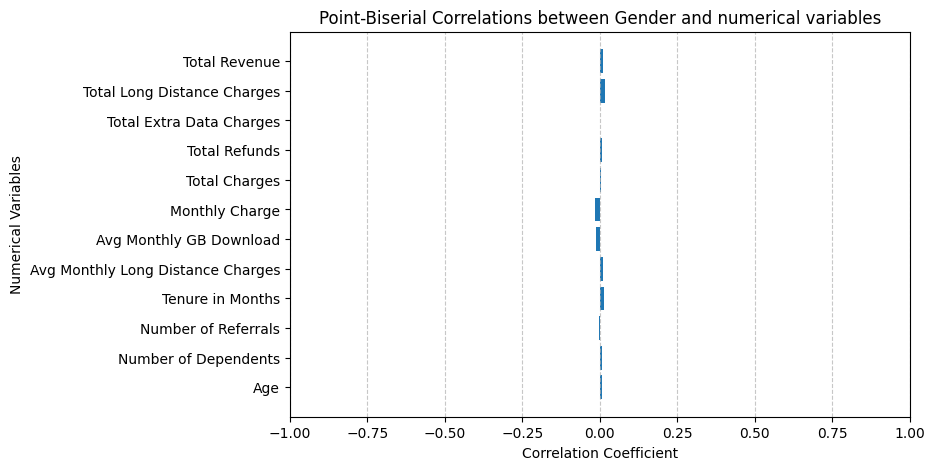

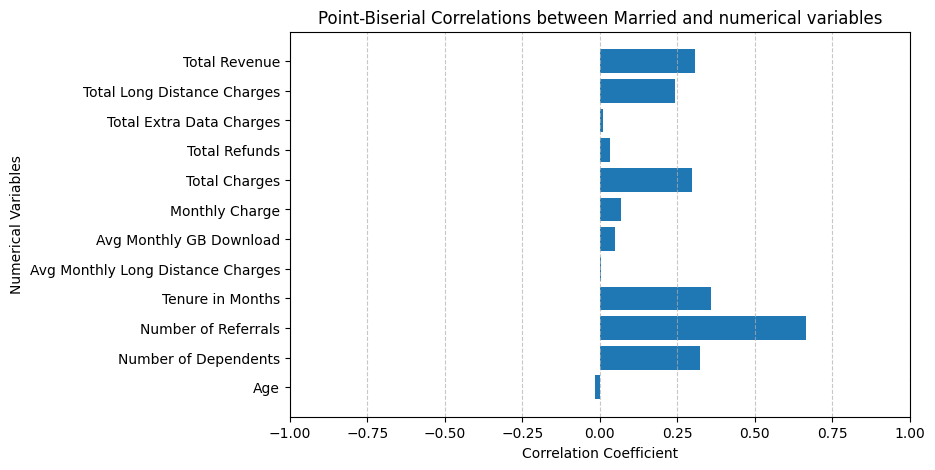

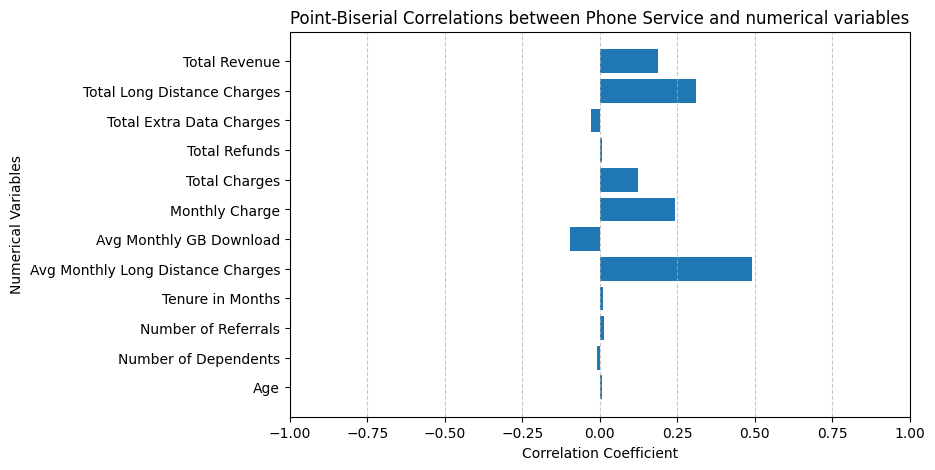

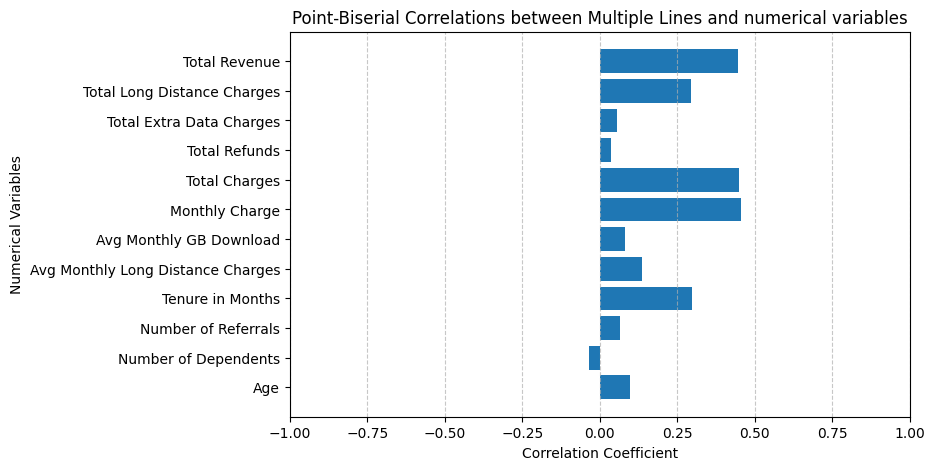

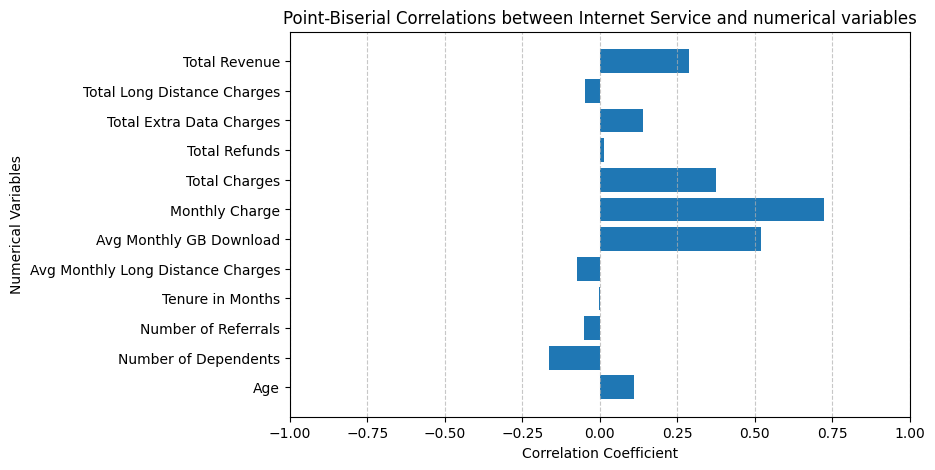

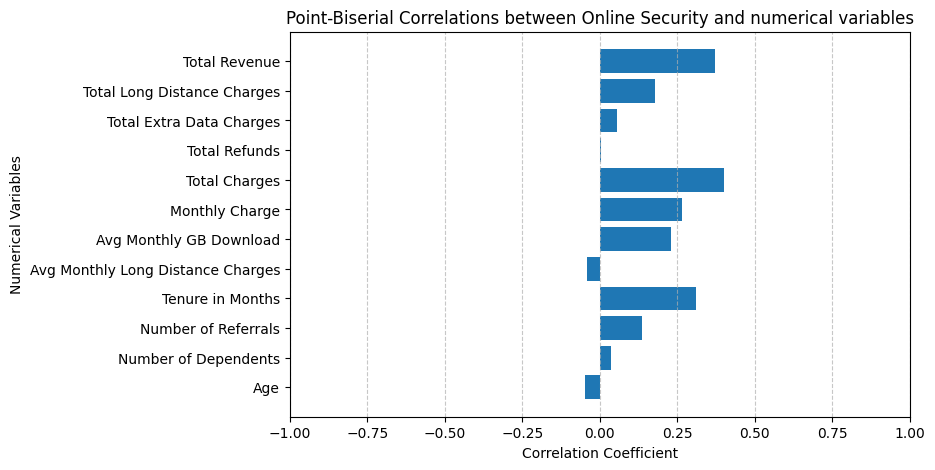

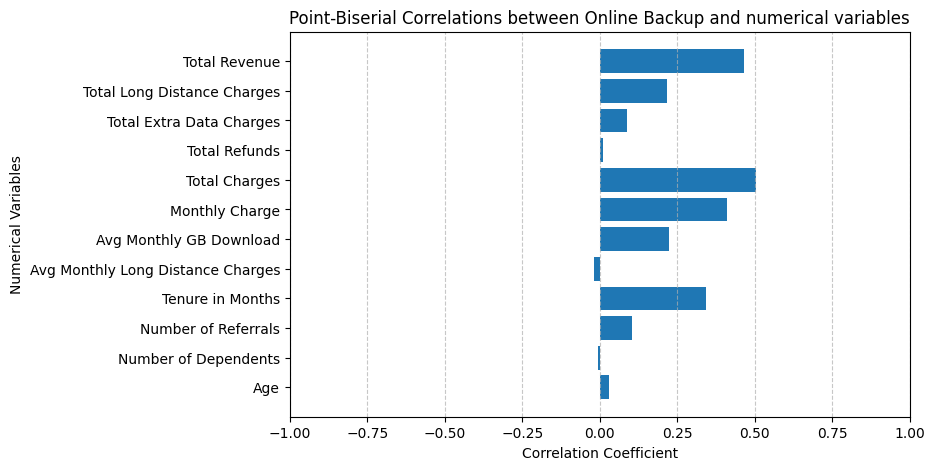

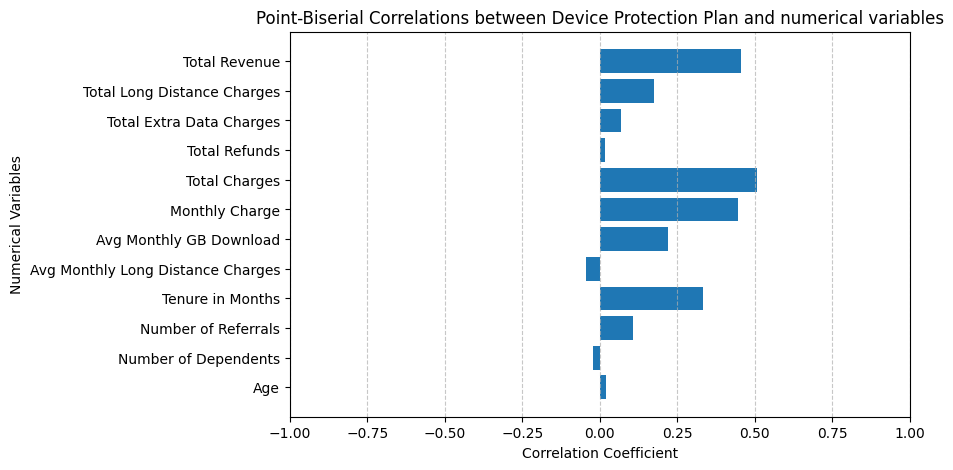

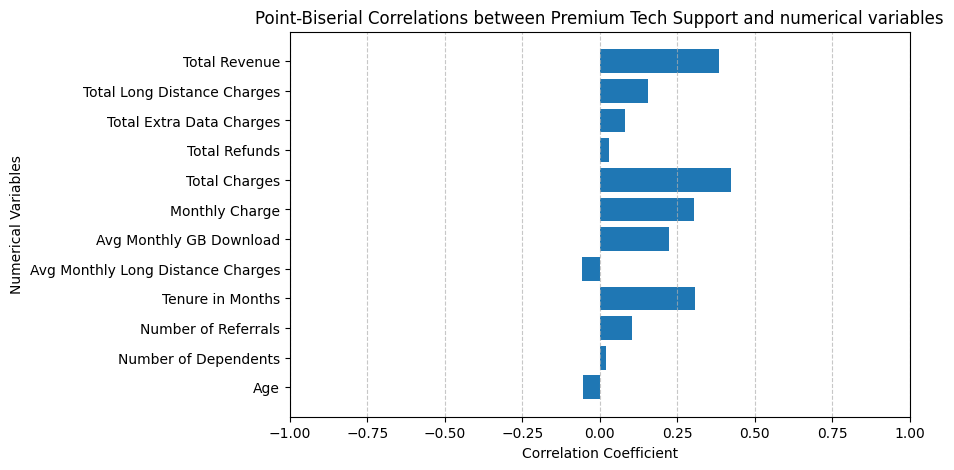

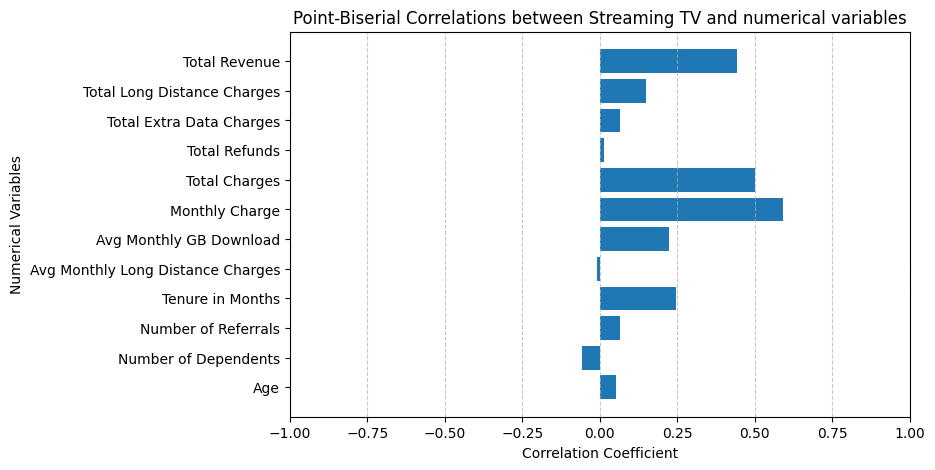

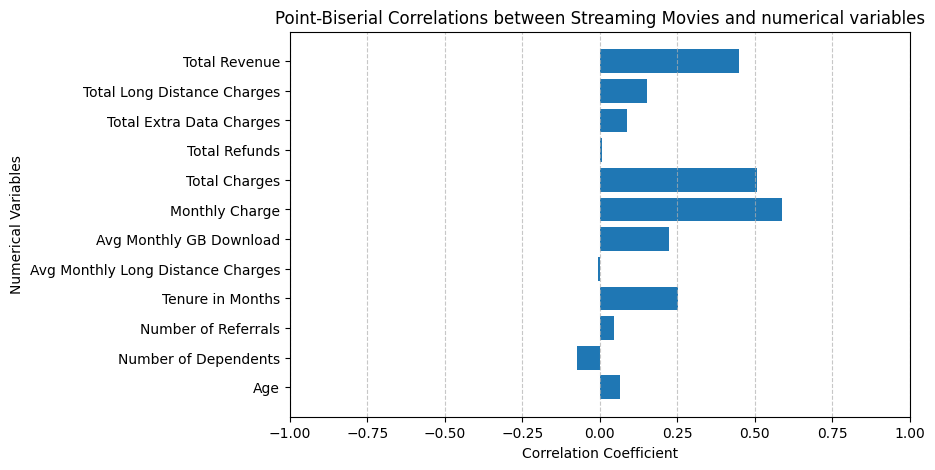

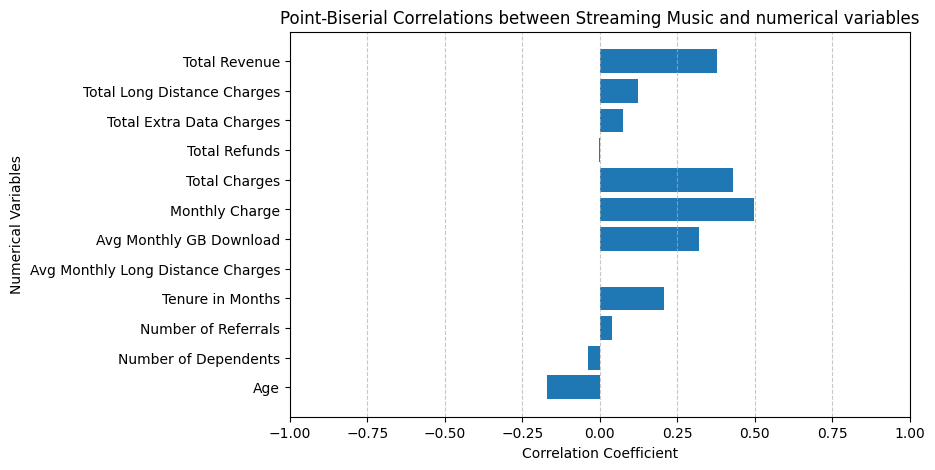

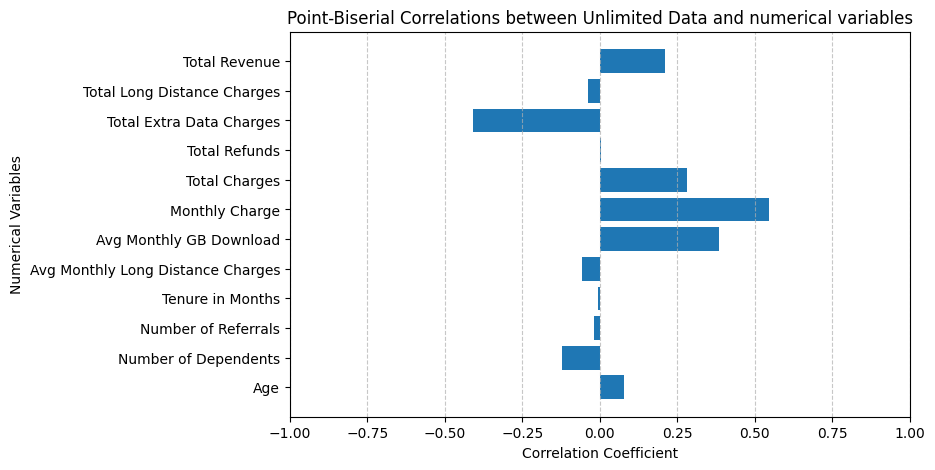

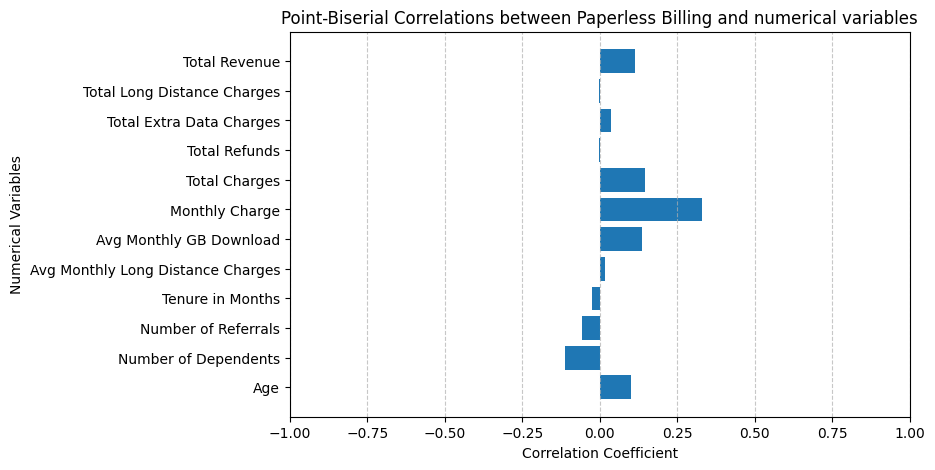

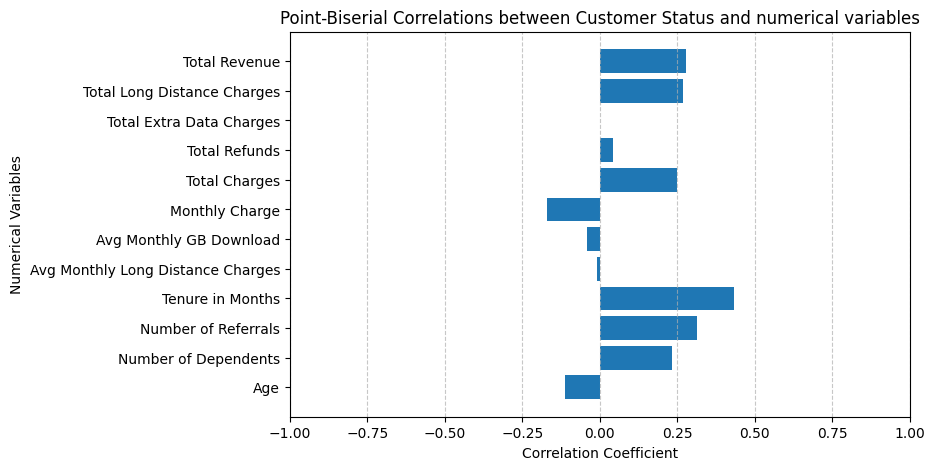

In [ ]:
for col in dcat_cols:
  if len(customer_df[col].unique()) == 2: # Checking if binary
    corr_values = {}
    for num_col in dnum_cols:
      corr, _ = pointbiserialr(customer_df[col], customer_df[num_col])
      corr_values[num_col] = corr

    # Creating a bar chart for the correlation values
    plt.figure(figsize=(8, 5))
    plt.barh(list(corr_values.keys()), list(corr_values.values()))
    plt.title(f'Point-Biserial Correlations between {col} and numerical variables')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Numerical Variables')
    plt.xlim(-1, 1)  # Setting the x-axis limits to -1 and 1 for correlation coefficient
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

**Overall Analysis:**

*  The correlations vary in strength, with some binary categorical variables exhibiting stronger correlations with certain numerical features compared to others.
*  Monthly Charge appears to have notable correlations with multiple binary variables, suggesting it might be an important feature in understanding customer behavior.
*  Internet Service and its types (DSL, fiber optic) show strong correlations with various numerical features, highlighting its impact on customer behavior and charges.

# *******NOTICE*******

The code that has been commented out below appears to conflict with the rest of the code, as it led to errors. The outcome of this code is discussed in the main body of the work.

### Point-Biserial Correlations between Customer Status and Numerical and Binary Categorical Variable used for Feature Extraction

In [ ]:
# # List of features (numerical and binary categorical)
# features = ['Age', 'Tenure in Months', 'Number of Dependents', 'Total Revenue', 'Total Charges',
#                 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Online Security',
#                 'Online Backup', 'Device Protection Plan', 'Premium Tech Support']

# # Calculate point-biserial correlations between each feature and Customer Status
# correlations = {}
# for feature in features:
#     corr, _ = pointbiserialr(customer_df[feature], customer_df['Customer Status'])
#     correlations[feature] = corr

# # Print the correlations
# pprint.pprint("Point-Biserial Correlations between Customer Status and Numerical and Binary Categorical Variables:")
# pprint.pprint(correlations)
# print('\n')

In [ ]:
# # Converting correlations dictionary to a DataFrame for easy plotting
# correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# # Sorting by correlation values for better visualisation
# correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# # Creating a bar chart
# plt.figure(figsize=(12, 6))
# plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
# plt.xlabel('Correlation Coefficient')
# plt.ylabel('Features')
# plt.title('Point-Biserial Correlations between Customer Status and Features used for Extraction')
# plt.xlim(-1, 1)  # Setting the x-axis limits to -1 and 1 for correlation coefficient
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.gca().invert_yaxis()  # Invert the y-axis for better readability
# plt.show()

**Key Observations**

Despite a few negative correlations, all the correlations are statistically significant (p < 0.05, based on ‘r’ values), demonstrating that these features are related to customer status. These relationships range in strength from weak to strong.

### Chi-Squared Test on non binary Categorical Variables

In [ ]:
# from scipy.stats import chi2_contingency

# # Creating contingency tables and performing chi-squared tests for each variable
# cat_var = ['Age Group', 'Tenure Group', 'Family Size']

# for var in cat_var:
#     contingency_table = pd.crosstab(customer_df[var], customer_df['Customer Status'])
#     chi2, p, _, _ = chi2_contingency(contingency_table)

#     print(f"Chi-Squared Test Results ({var} vs. Customer Status):")
#     print("Chi-Squared Value:", chi2)
#     print("p-value:", p)
#     print("\n")

**Key Observations**

*  `Age Group` and `Tenure Group` exhibit strong associations with `Customer Status`, indicating that changes in these variables are closely related to changes in whether a customer stays or churns.

*  `Family Size` does not display a significant association with `Customer Status`, suggesting that alterations in `Family Size` are not strongly linked to changes in whether a customer stays or churns from the telecom company.

In [ ]:
# List of columns to encode
enc_list = ['Payment Method', 'Contract', 'Internet Type', 'Offer']

# Transform the specified columns using pandas one-hot encoding
customer_df = pd.get_dummies(data=customer_df, columns=enc_list)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# List of columns to encode
enc_cat = ['Age Group', 'Tenure Group', 'Family Size']

# Apply the encoding to the selected columns
customer_df[enc_cat] = customer_df[enc_cat].apply(enc.fit_transform)

In [ ]:
# Dropping first list of irrelevant features
# Creating a list of featues to drop
to_drop = ['Customer ID', 'Zip Code', 'Latitude', 'Longitude', 'City']

#Dropping featues
customer_df.drop(to_drop, axis=1, inplace=True)

customer_df.shape

(6568, 49)

### Dropping Engineered Features

By identifying and removing redundant variables, features that do not make significant contributions to the objective are dropped. This involved identifying features that are noisy (i.e exists in another form as another feature), strongly correlated, or duplicative (already captured through feature engineering).

In [ ]:
# Creating a list of featues to drop
to_drop = ['Age Group', 'Tenure Group', 'Family Size', 'No of Additional Services',
           'Avg Revenue', 'Revenue Charge Ratio']

#Dropping featues
customer_df.drop(to_drop, axis=1, inplace=True)

customer_df.shape

(6568, 43)

### 4.2.3 Feature Scaling

Standardisation, also known as z-score normalisation, involves transforming any column by subtracting its mean and dividing by its variance. This process centers all features around zero and ensures that they have a variance of one.

In [ ]:
# Checking the variance of the numerical data columns
ft_num_cols = customer_df.select_dtypes("number")

# Display the variance with custom formatting
print(ft_num_cols.var().map('{:.2f}'.format))

Gender                                     0.25
Age                                      283.63
Married                                    0.25
Number of Dependents                       0.94
Number of Referrals                        9.12
Tenure in Months                         571.88
Phone Service                              0.09
Avg Monthly Long Distance Charges        238.38
Multiple Lines                             0.25
Internet Service                           0.16
Avg Monthly GB Download                  417.10
Online Security                            0.21
Online Backup                              0.23
Device Protection Plan                     0.23
Premium Tech Support                       0.21
Streaming TV                               0.24
Streaming Movies                           0.24
Streaming Music                            0.23
Unlimited Data                             0.22
Paperless Billing                          0.24
Monthly Charge                          

In [ ]:
from sklearn.preprocessing import StandardScaler

# High variance columns
high_var_cols = ["Age", "Tenure in Months", "Avg Monthly Long Distance Charges",
                 "Avg Monthly GB Download", "Monthly Charge", "Total Charges",
                 "Total Refunds", "Total Extra Data Charges", "Total Revenue",
                 "Total Long Distance Charges", "Number of Referrals"]

scaler = StandardScaler()

# Scaling the columns
scaled_cols = scaler.fit_transform(customer_df[high_var_cols])

# Creating a new dataframe with scaled columns
scaled_df = pd.DataFrame(scaled_cols, columns=high_var_cols)

# Dropping the original high variance columns
customer_df.drop(columns=high_var_cols, inplace=True)

# Resetting the indices before concatenating to avoid any index misalignment issues
customer_df.reset_index(drop=True, inplace=True)
scaled_df.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe and the scaled dataframe
customer_df = pd.concat([customer_df, scaled_df], axis=1)

In [ ]:
display(customer_df.head())

Gender  Married  Number of Dependents  Phone Service  Multiple Lines  \
0       0        1                     0              1               0   
1       1        0                     0              1               1   
2       1        0                     0              1               0   
3       1        1                     0              1               0   
4       0        1                     0              1               0   

   Internet Service  Online Security  Online Backup  Device Protection Plan  \
0                 1                0              1                       0   
1                 1                0              0                       0   
2                 1                0              0                       1   
3                 1                0              1                       1   
4                 1                0              0                       0   

   Premium Tech Support  ...  Tenure in Months  \
0                     1  ...         -1.061408   
1                     0  ...         -1.061408   
2                     0  ...         -1.270506   
3                     0  ...         -0.894129   
4                     1  ...         -1.312325   

   Avg Monthly Long Distance Charges  Avg Monthly GB Download  Monthly Charge  \
0                           1.260238                -0.238867        0.023381   
1                          -0.793070                -0.532674       -2.219996   
2                           0.694121                 0.446682        0.290910   
3                           0.316493                -0.826481        1.067711   
4                          -1.007469                -0.483707        0.613234   

   Total Charges  Total Refunds  Total Extra Data Charges  Total Revenue  \
0      -0.810759      -0.256469                 -0.277445      -0.792048   
1      -0.833431       4.454403                  0.111096      -0.921284   
2      -0.949928      -0.256469                 -0.277445      -0.990357   
3      -0.523668      -0.256469                 -0.277445      -0.570574   
4      -0.955919      -0.256469                 -0.277445      -1.034995   

   Total Long Distance Charges  Number of Referrals  
0                    -0.484500            -0.005295  
1                    -0.822633            -0.667665  
2                    -0.777134            -0.667665  
3                    -0.508026            -0.336480  
4                    -0.910420             0.325891  

[5 rows x 43 columns]

In [ ]:
# Checking the variance of the numerical data columns
scaled_num_cols = customer_df.select_dtypes("number")

# Display the variance with custom formatting
print(scaled_num_cols.var().map('{:.2f}'.format))

Gender                               0.25
Married                              0.25
Number of Dependents                 0.94
Phone Service                        0.09
Multiple Lines                       0.25
Internet Service                     0.16
Online Security                      0.21
Online Backup                        0.23
Device Protection Plan               0.23
Premium Tech Support                 0.21
Streaming TV                         0.24
Streaming Movies                     0.24
Streaming Music                      0.23
Unlimited Data                       0.22
Paperless Billing                    0.24
Customer Status                      0.20
Payment Method_Bank Withdrawal       0.25
Payment Method_Credit Card           0.24
Payment Method_Mailed Check          0.05
Contract_Month-to-Month              0.25
Contract_One Year                    0.18
Contract_Two Year                    0.20
Internet Type_Cable                  0.10
Internet Type_DSL                 

### Training and Test Sets

To address the issue of imbalanced label classes and improve the accuracy of the sampling, the approach of stratified sampling was implemented.

In [ ]:
# Split data into features and label
X = customer_df.drop(columns=["Customer Status"]).copy()
y = customer_df['Customer Status'].copy()

# Check the splits are correct
# y["Customer Status"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

### 4.2.4 Feature Selection

A. Filter Method -- Correlation Matrix

To drop features, the dataset was analysed, using Pearson's correlation coefficient. In this process, the correlations between all features and the target feature are computed. The selection of features is then based on these correlation values. For this project, a threshold of 0.2 was set. Any feature having a correlation value greater than 0.2 with the target is selected for the classification task.

In [ ]:
# Calculating the correlation matrix of 'customer_df'
cor = customer_df.corr()

# Computing the absolute correlation values between 'Customer Status' and other columns
cor_target = abs(cor["Customer Status"])

# Filtering to include only the correlation values greater than 0.2
relevant_features = cor_target[cor_target > 0.2]

# Retrieving and print the column names (indices) of the relevant features
relevant_features.index

Index(['Number of Dependents', 'Internet Service', 'Customer Status',
       'Payment Method_Credit Card', 'Contract_Month-to-Month',
       'Contract_One Year', 'Contract_Two Year', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Offer_Offer E', 'Tenure in Months',
       'Total Charges', 'Total Revenue', 'Total Long Distance Charges',
       'Number of Referrals'],
      dtype='object')

B. Filter Method -- ANOVA (Analysis of Variance)

This method involves selecting the best features using univariate statistical tests. To achieve this, the `SelectKBest` function from the `sklearn` library is used. This function retains only the specified number of top features and removes all others. For this analysis, a value of k=15 is chosen, resulting in the retention of only 15 features. The scoring function `f_classif` is selected, which employs the F-value from the ANOVA table to assess and rank the features based on their relevance and impact on the target variable.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Feature extraction
test = SelectKBest(score_func=f_classif, k=15)
fit = test.fit(X, y)

# Retrieve the names of the selected features based on the indices returned
selected_indices = fit.get_support(indices=True)
print(selected_indices)
selected_columns = X.columns[selected_indices].tolist()
print(selected_columns)

[ 2  5  6 16 18 19 20 23 24 30 32 36 39 40 41]
['Number of Dependents', 'Internet Service', 'Online Security', 'Payment Method_Credit Card', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'Internet Type_Fiber Optic', 'Internet Type_None', 'Offer_Offer E', 'Tenure in Months', 'Total Charges', 'Total Revenue', 'Total Long Distance Charges', 'Number of Referrals']


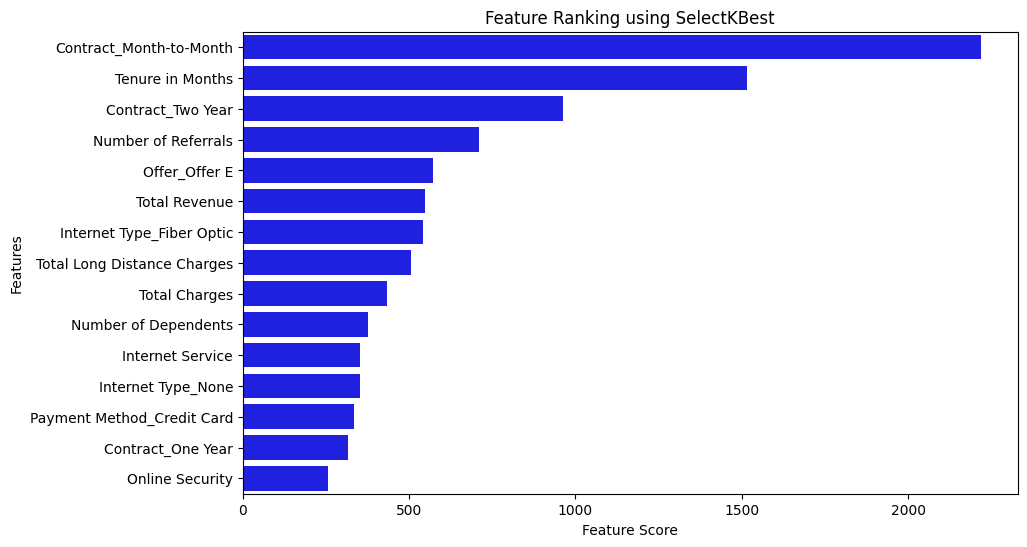

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Feature extraction
test = SelectKBest(score_func=f_classif, k=15)
fit = test.fit(X, y)

# Retrieve the names of the selected features based on the indices returned
selected_indices = fit.get_support(indices=True)
selected_scores = fit.scores_[selected_indices]
selected_columns = X.columns[selected_indices].tolist()

# Create a DataFrame to store the selected feature names and their scores
selected_features_df = pd.DataFrame({'Feature': selected_columns, 'Score': selected_scores})

# Sort the features by score in descending order
selected_features_df = selected_features_df.sort_values(by='Score', ascending=False)

# Create a bar chart using Seaborn to visualize the feature ranking
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=selected_features_df, color="blue")
plt.xlabel('Feature Score')
plt.ylabel('Features')
plt.title('Feature Ranking using SelectKBest')
plt.show()

C. Wrapper Method -- Backward Elimination

A machine learning technique is used in this approach to identify the necessary features. The method is based on analysing `p-values`, and the Ordinary Linear Model from the `statsmodels` library is used for this purpose. This library was chosen because of its ability to deliver `p-values` as an inherent element of the models, which adds to the ease of use and convenience of the feature selection process.

In [ ]:
import statsmodels.api as sm

# Add a constant column for the intercept in logistic regression.
X_new = sm.add_constant(X)

# Fit a logistic regression model using statsmodels
model = sm.Logit(y, X_new).fit()

# Retrieve the p-values of each feature
#model.pvalues

Optimization terminated successfully.
         Current function value: 0.325460
         Iterations 13


In [ ]:
# Creating a list containing all the column names of the independent variables
selected_features = list(X.columns)

# Setting an initial value for pmax (maximum p-value)
pmax = 1

# Entering a while loop that iteratively selects features based on p-values
while (len(selected_features) > 0):
    # Initialising an empty list 'p' to store p-values for each feature
    p = []

    # Extracting the selected features from the DataFrame 'X' and add a constant column
    X_new = X[selected_features]
    X_new = sm.add_constant(X_new)

    # Fitting a logistic regression model using statsmodels
    model = sm.Logit(y, X_new).fit()

    # Extracting the p-values and create a Series with feature names as index
    p = pd.Series(model.pvalues.values[1:], index=selected_features)

    # Finding the maximum p-value (pmax) among the selected features
    pmax = max(p)

    # Finding the feature corresponding to the maximum p-value (feature_pmax)
    feature_pmax = p.idxmax()

    # Checking if the maximum p-value is greater than 0.05
    # If true, remove the feature with the maximum p-value from the list 'selected_features'
    # Otherwise, break out of the loop as no more features need to be removed
    if (pmax > 0.05):
        selected_features.remove(feature_pmax)
    else:
        break

selected_features

Optimization terminated successfully.
         Current function value: 0.325460
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.325460
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.325460
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.325460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325460
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.325460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325462
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.325465
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.325465
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.32547

['Married',
 'Number of Dependents',
 'Phone Service',
 'Online Security',
 'Online Backup',
 'Premium Tech Support',
 'Paperless Billing',
 'Payment Method_Bank Withdrawal',
 'Payment Method_Credit Card',
 'Contract_Month-to-Month',
 'Contract_Two Year',
 'Internet Type_Cable',
 'Offer_None',
 'Offer_Offer A',
 'Offer_Offer C',
 'Offer_Offer D',
 'Age',
 'Tenure in Months',
 'Monthly Charge',
 'Total Charges',
 'Number of Referrals']

D. Wrapper Method -- Recursive Feature Elimination (or RFE)

This method works by eliminating attributes iteratively and creating a model on those that remain. It employs model accuracy to determine which attributes (and combinations of attributes) are most important in predicting the target attribute. RFE was used with the Logistic Regression classifier to select the top 15 features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=15)
fit = rfe.fit(X, y)

# Printing the number of selected features
print("Num Features: %s" % (fit.n_features_))

# Printing a boolean mask indicating which features are selected
print("Selected Features: %s" % (fit.support_))

# Printing the ranking of each feature (1 = selected, 2 = not selected, etc.)
print("Feature Ranking: %s" % (fit.ranking_))

# Getting the selected features (Boolean mask of selected features, True for selected, False for removed)
rfe_selected_features_mask = fit.support_

# Retrieving the names of the selected features
rfe_selected_features = X.columns[rfe_selected_features_mask].tolist()

Num Features: 15
Selected Features: [False  True  True  True False  True  True False False  True False False
 False False False False  True  True  True False  True False False False
 False False  True False False  True False False  True False False False
  True False False False False  True]
Feature Ranking: [28  1  1  1 14  1  1  6 17  1 16 12 11 18  4 26  1  1  1 22  1  5 15 25
 13 21  1 20  7  1  3 10  1 24 23  2  1 19 27  8  9  1]


In [ ]:
rfe_selected_features

['Married',
 'Number of Dependents',
 'Phone Service',
 'Internet Service',
 'Online Security',
 'Premium Tech Support',
 'Payment Method_Credit Card',
 'Payment Method_Mailed Check',
 'Contract_Month-to-Month',
 'Contract_Two Year',
 'Offer_Offer A',
 'Offer_Offer D',
 'Tenure in Months',
 'Total Charges',
 'Number of Referrals']

**Key Observation**

The seven features `Number of Dependents`, `Payment Method_Credit Card`, `Contract_Month-to-Month`, `Contract_Two Year`, `Tenure in Months`, `Total Charges`, and `Number of Referrals` appear to be consistently important or relevant regardless of the feature selection technique used, suggesting that they may have a significant impact on the outcome of the prediction tasks.

# 5 Model Development and Prediction

## 5.1 Without Optimisation

### 5.1.1 Using All Features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Instnatiating the models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)  # Set probability to True
tree = DecisionTreeClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()

# Training the models
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
tree.fit(X_train, y_train)
gnb.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Making predictions with each model
logreg_preds = logreg.predict(X_test)
svm_preds = svm.predict(X_test)
tree_preds = tree.predict(X_test)
gnb_preds = gnb.predict(X_test)
rf_preds = rf.predict(X_test)

###Model Evaluation

In [ ]:
# Store model predictions in a dictionary
# Makes it easier to iterate through each model and print the results.
model_preds = {
    "Logistic Regression": logreg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Naive Bayes": gnb_preds,
    "Random Forest": rf_preds
}

# Store model predictions and confusion matrices in a dictionary
model_results = {}
for model, preds in model_preds.items():
    report = classification_report(y_test, preds, target_names = ['Churned', 'Stayed'])
    cm = confusion_matrix(y_test, preds)
    model_results[model] = {"classification_report": report, "confusion_matrix": cm}

# Print the results
for model, results in model_results.items():
    print(f"{model} Results:")
    print("Confusion Matrix:\n", results["confusion_matrix"], "\n")
    print("Classification Report:\n", results["classification_report"], "\n")

Logistic Regression Results:
Confusion Matrix:
 [[ 417  144]
 [ 146 1264]] 

Classification Report:
               precision    recall  f1-score   support

     Churned       0.74      0.74      0.74       561
      Stayed       0.90      0.90      0.90      1410

    accuracy                           0.85      1971
   macro avg       0.82      0.82      0.82      1971
weighted avg       0.85      0.85      0.85      1971
 

Support Vector Machine Results:
Confusion Matrix:
 [[ 403  158]
 [ 120 1290]] 

Classification Report:
               precision    recall  f1-score   support

     Churned       0.77      0.72      0.74       561
      Stayed       0.89      0.91      0.90      1410

    accuracy                           0.86      1971
   macro avg       0.83      0.82      0.82      1971
weighted avg       0.86      0.86      0.86      1971
 

Decision Tree Results:
Confusion Matrix:
 [[ 398  163]
 [ 180 1230]] 

Classification Report:
               precision    recall  f1-scor

In [ ]:
# Make predictions with probabilities for each model
logreg_pred_probs = logreg.predict_proba(X_test)[:, 1]
svm_pred_probs = svm.predict_proba(X_test)[:, 1]
tree_pred_probs = tree.predict_proba(X_test)[:, 1]
gnb_pred_probs = gnb.predict_proba(X_test)[:, 1]
rf_pred_probs = rf.predict_proba(X_test)[:, 1]

# Make predictions with probabilities for each model
model_preds = {
    "Logistic Regression": logreg_pred_probs,
    "Support Vector Machine": svm_pred_probs,
    "Decision Tree": tree_pred_probs,
    "Naive Bayes": gnb_pred_probs,
    "Random Forest": rf_pred_probs
}

# Calculate roc_auc_score and print the results
for model, probs in model_preds.items():
    roc_auc = roc_auc_score(y_test, probs)
    print(f"{model}: {roc_auc}")

Logistic Regression: 0.914363914489071
Support Vector Machine: 0.9139467263372144
Decision Tree: 0.7908939204308416
Naive Bayes: 0.8833952794528515
Random Forest: 0.9248644138506465


**Key Takeaway**

*  While both Logistic Regression and Random Forest show good overall `accuracies` (85% and 87%, respectively), the Random Forest model stands out due to its greater `precision` (0.83) and competitive `recall` (0.69), resulting in a considerably higher `F1 score` (0.75) for the `Churned` class.
*  The SVM model also shows promise for the `Churned` class, with a `precision `of 0.77 and a `recall` of 0.72, adding to a `F1 score` of 0.74.
*  The Random Forest model's ability to achieve a balanced `F1 score` for the `Churned` class gives it a strong choice for satisfying the defined data mining goal of a minimum predictive `F1 score` of 75% for this class.

Based on the `ROC AUC scores`, the Random Forest model remains the best performing model for this dataset. It achieved the highest `ROC AUC score` of 0.926. This shows that, even in a dataset with imbalanced class distributions, it is able to separate positive classes higher than negative classes.

In [ ]:
# Check the coefficient of the independent variable(s)
print(logreg.coef_)

[[ 0.05405185 -1.55888573  0.66007788  0.70295764 -0.08487102 -0.29435381
   0.54004056  0.21292903  0.09712952  0.58473579 -0.133282    0.11018929
  -0.19150655  0.05539634 -0.24860922  0.00195853  0.426881   -0.43378026
  -1.24542091  0.05173118  1.188749   -0.28523664  0.05197828 -0.06109545
   0.28941308  0.08078352 -0.93732548  0.10209975  0.33742077  0.73085702
  -0.3187763  -0.25065336  1.94838803 -0.00938302 -0.00237372 -0.32955943
  -0.76208114  0.06342508 -0.02364652 -0.5450083   0.20716989  1.48457366]]


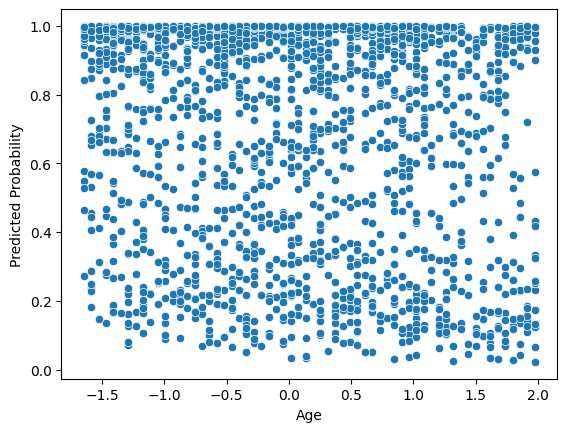

In [ ]:
# Get the predicted probabilities on the test set
predicted_probabilities = logreg.predict_proba(X_test)[:, 1]

# Create a DataFrame with the 'Age' and predicted probabilities
plot_data = pd.DataFrame({'Age': X_test['Age'], 'Predicted Probability': predicted_probabilities})

# Plot the scatterplot
sns.scatterplot(x='Age', y='Predicted Probability', data=plot_data)
plt.show()

### 5.1.2 Using RFE Selected Features

In [ ]:
X_new = X[rfe_selected_features]

# Split data into train and test
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y,
                                                            test_size=0.3,
                                                            stratify=y,
                                                            random_state=42)

# Instnatiating the models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)  # Set probability to True
tree = DecisionTreeClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()

# Training the models
logreg.fit(X_new_train, y_train)
svm.fit(X_new_train, y_train)
tree.fit(X_new_train, y_train)
gnb.fit(X_new_train, y_train)
rf.fit(X_new_train, y_train)

# Making predictions with each model
logreg_preds = logreg.predict(X_new_test)
svm_preds = svm.predict(X_new_test)
tree_preds = tree.predict(X_new_test)
gnb_preds = gnb.predict(X_new_test)
rf_preds = rf.predict(X_new_test)

In [ ]:
# Store model predictions in a dictionary
# Makes it easier to iterate through each model and print the results.
model_preds = {
    "Logistic Regression": logreg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Naive Bayes": gnb_preds,
    "Random Forest": rf_preds
}

# Store model predictions and confusion matrices in a dictionary
model_results = {}
for model, preds in model_preds.items():
    report = classification_report(y_test, preds, target_names = ['Churned', 'Stayed'])
    cm = confusion_matrix(y_test, preds)
    model_results[model] = {"classification_report": report, "confusion_matrix": cm}

# Print the results
for model, results in model_results.items():
    print(f"{model} Results:")
    print("Confusion Matrix:\n", results["confusion_matrix"], "\n")
    print("Classification Report:\n", results["classification_report"], "\n")

Logistic Regression Results:
Confusion Matrix:
 [[ 413  148]
 [ 156 1254]] 

Classification Report:
               precision    recall  f1-score   support

     Churned       0.73      0.74      0.73       561
      Stayed       0.89      0.89      0.89      1410

    accuracy                           0.85      1971
   macro avg       0.81      0.81      0.81      1971
weighted avg       0.85      0.85      0.85      1971
 

Support Vector Machine Results:
Confusion Matrix:
 [[ 402  159]
 [ 141 1269]] 

Classification Report:
               precision    recall  f1-score   support

     Churned       0.74      0.72      0.73       561
      Stayed       0.89      0.90      0.89      1410

    accuracy                           0.85      1971
   macro avg       0.81      0.81      0.81      1971
weighted avg       0.85      0.85      0.85      1971
 

Decision Tree Results:
Confusion Matrix:
 [[ 390  171]
 [ 176 1234]] 

Classification Report:
               precision    recall  f1-scor

In [ ]:
# Make predictions with probabilities for each model
logreg_pred_probs = logreg.predict_proba(X_new_test)[:, 1]
svm_pred_probs = svm.predict_proba(X_new_test)[:, 1]
tree_pred_probs = tree.predict_proba(X_new_test)[:, 1]
gnb_pred_probs = gnb.predict_proba(X_new_test)[:, 1]
rf_pred_probs = rf.predict_proba(X_new_test)[:, 1]

# Make predictions with probabilities for each model
model_preds = {
    "Logistic Regression": logreg_pred_probs,
    "Support Vector Machine": svm_pred_probs,
    "Decision Tree": tree_pred_probs,
    "Naive Bayes": gnb_pred_probs,
    "Random Forest": rf_pred_probs
}

# Calculate roc_auc_score and print the results
for model, probs in model_preds.items():
    roc_auc = roc_auc_score(y_test, probs)
    print(f"{model}: {roc_auc}")

Logistic Regression: 0.9111439804806515
Support Vector Machine: 0.9072767727335939
Decision Tree: 0.7851822353699701
Naive Bayes: 0.8798447554392486
Random Forest: 0.9068210262828535


**Key Takeaways:**

The most promising model appears to be the Random Forest model. While its `F1 score` is below the target, it achieves a well-balanced level of `precision` and `recall` for the `Churned` class and an `accuracy` of 85%. Both the Logistic Regression and SVM models show a similar pattern of `precision` and `recall` scores, but they fall just short of the desired `F1 score` threshold.

It is worth noticing that the Naive Bayes model has a significantly greater `recall` (0.85) for the `Churned` class, indicating that it can capture actual churners. However, its `precision` (0.57) and overall `F1 score` (0.69) are comparably lower, indicating that it may misclassify a considerable number of `Stayed` customers as `Churned`. While the Decision Tree model has a balanced `F1 score`, it falls short of the 75% criteria for the `Churned` class.

The `ROC AUC scores` indicate that all models have a strong ability to distinguish between the two classes. Logistic Regression, SVM, and Random Forest have very high `ROC AUC scores`, suggesting they are effective in ranking positive samples over negative ones.

### 5.1.3 Using ANOVA Selected Features

In [ ]:
X_anova = X[selected_columns]

# Split data into train and test
X_anova_train, X_anova_test, y_train, y_test = train_test_split(X_anova, y,
                                                                test_size=0.3,
                                                                stratify=y,
                                                                random_state=42)

# Instnatiating the models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)  # Set probability to True
tree = DecisionTreeClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()

# Training the models
logreg.fit(X_anova_train, y_train)
svm.fit(X_anova_train, y_train)
tree.fit(X_anova_train, y_train)
gnb.fit(X_anova_train, y_train)
rf.fit(X_anova_train, y_train)

# Making predictions with each model
logreg_preds = logreg.predict(X_anova_test)
svm_preds = svm.predict(X_anova_test)
tree_preds = tree.predict(X_anova_test)
gnb_preds = gnb.predict(X_anova_test)
rf_preds = rf.predict(X_anova_test)

In [ ]:
# Store model predictions in a dictionary
# Makes it easier to iterate through each model and print the results.
model_preds = {
    "Logistic Regression": logreg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Naive Bayes": gnb_preds,
    "Random Forest": rf_preds
}

# Store model predictions and confusion matrices in a dictionary
model_results = {}
for model, preds in model_preds.items():
    report = classification_report(y_test, preds, target_names = ['Churned', 'Stayed'])
    cm = confusion_matrix(y_test, preds)
    model_results[model] = {"classification_report": report, "confusion_matrix": cm}

# Print the results
for model, results in model_results.items():
    print(f"{model} Results:")
    print("Confusion Matrix:\n", results["confusion_matrix"], "\n")
    print("Classification Report:\n", results["classification_report"], "\n")

Logistic Regression Results:
Confusion Matrix:
 [[ 412  149]
 [ 163 1247]] 

Classification Report:
               precision    recall  f1-score   support

     Churned       0.72      0.73      0.73       561
      Stayed       0.89      0.88      0.89      1410

    accuracy                           0.84      1971
   macro avg       0.80      0.81      0.81      1971
weighted avg       0.84      0.84      0.84      1971
 

Support Vector Machine Results:
Confusion Matrix:
 [[ 412  149]
 [ 145 1265]] 

Classification Report:
               precision    recall  f1-score   support

     Churned       0.74      0.73      0.74       561
      Stayed       0.89      0.90      0.90      1410

    accuracy                           0.85      1971
   macro avg       0.82      0.82      0.82      1971
weighted avg       0.85      0.85      0.85      1971
 

Decision Tree Results:
Confusion Matrix:
 [[ 392  169]
 [ 174 1236]] 

Classification Report:
               precision    recall  f1-scor

In [ ]:
# Make predictions with probabilities for each model
logreg_pred_probs = logreg.predict_proba(X_anova_test)[:, 1]
svm_pred_probs = svm.predict_proba(X_anova_test)[:, 1]
tree_pred_probs = tree.predict_proba(X_anova_test)[:, 1]
gnb_pred_probs = gnb.predict_proba(X_anova_test)[:, 1]
rf_pred_probs = rf.predict_proba(X_anova_test)[:, 1]

# Make predictions with probabilities for each model
model_preds = {
    "Logistic Regression": logreg_pred_probs,
    "Support Vector Machine": svm_pred_probs,
    "Decision Tree": tree_pred_probs,
    "Naive Bayes": gnb_pred_probs,
    "Random Forest": rf_pred_probs
}

# Calculate roc_auc_score and print the results
for model, probs in model_preds.items():
    roc_auc = roc_auc_score(y_test, probs)
    print(f"{model}: {roc_auc}")

Logistic Regression: 0.8992553823592623
Support Vector Machine: 0.9074120428313169
Decision Tree: 0.787673986422422
Naive Bayes: 0.8841335760609853
Random Forest: 0.9206956928483837


**Key Takeaways:**

None of the models meet the data mining goal. The SVM model comes closest to the target, with a `F1 score` of 0.74 for the `Churned` class and an accuracy of 85%, while the Logistic Regression and Random Forest models also have comparable `F1 scores`. However, none of these models completely meet the purpose. For the `Churned` class, the Naive Bayes model has a greater recall (0.81) but falls short in accuracy and overall F1 score (0.71). The Decision Tree model has balanced precision and recall, but its F1 score is still below the target.

All models have different abilities to distinguish between the two classes. Random Forest has the highest `ROC AUC score`, suggesting its ability to rank positive samples above negative ones. `ROC AUC scores` for Support Vector Machine and Naive Bayes are similarly comparable.

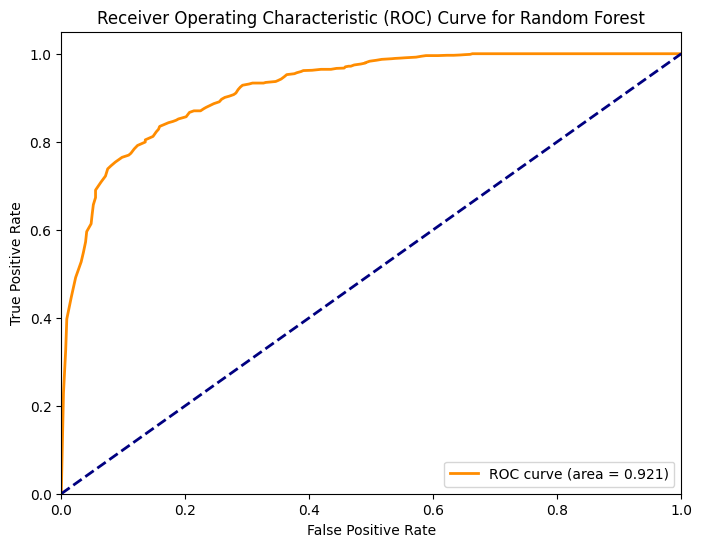

In [ ]:
# Calculate ROC curve data for the Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred_probs)

# Calculate ROC AUC score for the Random Forest model
roc_auc_rf = roc_auc_score(y_test, rf_pred_probs)

# Plot ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

## 5.2 Handling Class Imbalance through SMOTE Oversampling



In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE oversampling to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

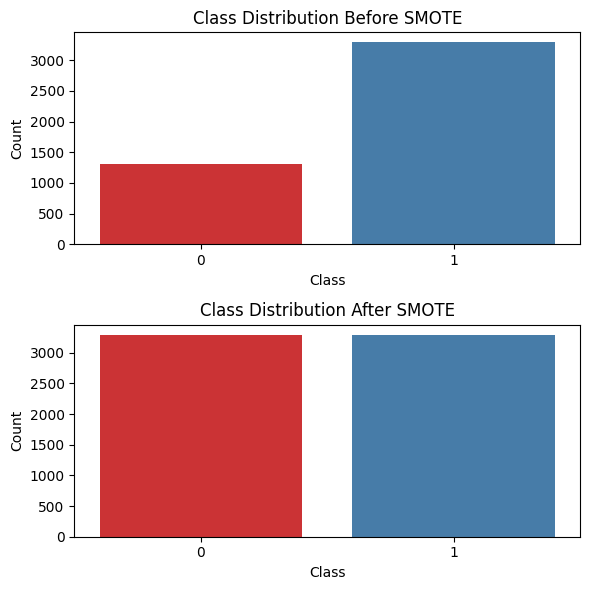

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the class distribution before and after SMOTE
class_counts_before = y_train.value_counts()
class_counts_after = y_train_resampled.value_counts()

# Creating a bar plot to visualize class distribution
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.barplot(x=class_counts_before.index, y=class_counts_before.values, palette='Set1')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette='Set1')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Key Takeaways**

SMOTE was used to improve the predictive capabilities of the selected models, particularly for the minority class (churned consumers), to minimise the impacts of class imbalance. Prior to using SMOTE, the class distribution showed a significant disparity, with the churning class accounting for a smaller percentage of the dataset. A more balanced class distribution after SMOTE is observed, with both churned and non-churned classes represented more fairly.

### 5.2.1 Using All Features

In [ ]:
# Instnatiating the models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)  # Set probability to True
tree = DecisionTreeClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()

# Training the models
logreg.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
tree.fit(X_train_resampled, y_train_resampled)
gnb.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train_resampled, y_train_resampled)

# Making predictions with each model
logreg_preds = logreg.predict(X_test)
svm_preds = svm.predict(X_test)
tree_preds = tree.predict(X_test)
gnb_preds = gnb.predict(X_test)
rf_preds = rf.predict(X_test)

In [ ]:
# Evaluate the performance of the model on the resampled test data
# Store model predictions in a dictionary
# Makes it easier to iterate through each model and print the results.
model_preds = {
    "Logistic Regression": logreg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Naive Bayes": gnb_preds,
    "Random Forest": rf_preds
}

# Store model predictions and confusion matrices in a dictionary
model_results = {}
for model, preds in model_preds.items():
    report = classification_report(y_test, preds, target_names = ['Churned', 'Stayed'])
    cm = confusion_matrix(y_test, preds)
    model_results[model] = {"classification_report": report, "confusion_matrix": cm}

# Print the results
for model, results in model_results.items():
    print(f"{model} Results:")
    print("SMOTE Confusion Matrix:\n", results["confusion_matrix"], "\n")
    print("SMOTE Classification Report:\n", results["classification_report"], "\n")

Logistic Regression Results:
SMOTE Confusion Matrix:
 [[ 447  114]
 [ 209 1201]] 

SMOTE Classification Report:
               precision    recall  f1-score   support

     Churned       0.68      0.80      0.73       561
      Stayed       0.91      0.85      0.88      1410

    accuracy                           0.84      1971
   macro avg       0.80      0.82      0.81      1971
weighted avg       0.85      0.84      0.84      1971
 

Support Vector Machine Results:
SMOTE Confusion Matrix:
 [[ 447  114]
 [ 202 1208]] 

SMOTE Classification Report:
               precision    recall  f1-score   support

     Churned       0.69      0.80      0.74       561
      Stayed       0.91      0.86      0.88      1410

    accuracy                           0.84      1971
   macro avg       0.80      0.83      0.81      1971
weighted avg       0.85      0.84      0.84      1971
 

Decision Tree Results:
SMOTE Confusion Matrix:
 [[ 405  156]
 [ 202 1208]] 

SMOTE Classification Report:
       

In [ ]:
# Make predictions with probabilities for each model
logreg_pred_probs = logreg.predict_proba(X_test)[:, 1]
svm_pred_probs = svm.predict_proba(X_test)[:, 1]
tree_pred_probs = tree.predict_proba(X_test)[:, 1]
gnb_pred_probs = gnb.predict_proba(X_test)[:, 1]
rf_pred_probs = rf.predict_proba(X_test)[:, 1]

# Make predictions with probabilities for each model
model_preds = {
    "Logistic Regression": logreg_pred_probs,
    "Support Vector Machine": svm_pred_probs,
    "Decision Tree": tree_pred_probs,
    "Naive Bayes": gnb_pred_probs,
    "Random Forest": rf_pred_probs
}

# Calculate roc_auc_score and print the results
for model, probs in model_preds.items():
    roc_auc = roc_auc_score(y_test, probs)
    print(f"{model}: {roc_auc}")

Logistic Regression: 0.90933616515594
Support Vector Machine: 0.9102337517856917
Decision Tree: 0.7893313611711609
Naive Bayes: 0.8826373876436455
Random Forest: 0.9243176445304104


**Comparative Analysis of Imbalanced and Balanced Datasets**

Given that the models achieved optimal results using all features, they were subsequently used to train and predict the models when SMOTE was applied.

Model Performance Metrics:

*  Both results show similar `accuracy` values for all models, with most models achieving an `accuracy` of around 0.85 in imbalanced dataset and 0.84 in balanced dataset. The Random Forest model had the highest `accuracy` in both cases, with approximately 0.87.
*  When using SMOTE, the minority class (Churned) shows improved `recall` values across all models. This indicates that the models better capture the positive class instances.
*  The `precision` values when SMOTE was utilised are slightly lower than those in the imbalanced dataset for most models, indicating that there is a trade-off between correctly classifying positive class instances and avoiding false positives.
*  The `ROC AUC scores` in the SMOTE result are relatively similar to those in non SMOTE result, indicating that the models' ability to discriminate between positive and negative classes remains consistent with and without SMOTE.
*  Random Forest consistently shows the highest `ROC AUC scores` in both results, indicating its superior ability to rank instances correctly.
*  SMOTE has increased the `recall` values for the Churned class, making the models more sensitive to detecting instances of the minority class. This makes it more favorable as correctly identifying customers who are likely to churn is a priority.

### 5.2.2 Using ANOVA Selected Features

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to the training data
sm = SMOTE(random_state=42)
X_anova_train_resampled, y_anova_train_resampled = sm.fit_resample(X_anova_train, y_train)

# Instnatiating the models
logreg = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)  # Set probability to True
tree = DecisionTreeClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()

# Training the models
logreg.fit(X_anova_train_resampled, y_anova_train_resampled)
svm.fit(X_anova_train_resampled, y_anova_train_resampled)
tree.fit(X_anova_train_resampled, y_anova_train_resampled)
gnb.fit(X_anova_train_resampled, y_anova_train_resampled)
rf.fit(X_anova_train_resampled, y_anova_train_resampled)

# Making predictions with each model
logreg_preds = logreg.predict(X_anova_test)
svm_preds = svm.predict(X_anova_test)
tree_preds = tree.predict(X_anova_test)
gnb_preds = gnb.predict(X_anova_test)
rf_preds = rf.predict(X_anova_test)

In [ ]:
# Evaluate the performance of the model on the resampled test data
# Store model predictions in a dictionary
# Makes it easier to iterate through each model and print the results.
model_preds = {
    "Logistic Regression": logreg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Naive Bayes": gnb_preds,
    "Random Forest": rf_preds
}

# Store model predictions and confusion matrices in a dictionary
model_results = {}
for model, preds in model_preds.items():
    report = classification_report(y_test, preds, target_names = ['Churned', 'Stayed'])
    cm = confusion_matrix(y_test, preds)
    model_results[model] = {"classification_report": report, "confusion_matrix": cm}

# Print the results
for model, results in model_results.items():
    print(f"{model} Results:")
    print("SMOTE Confusion Matrix:\n", results["confusion_matrix"], "\n")
    print("SMOTE Classification Report:\n", results["classification_report"], "\n")

Logistic Regression Results:
SMOTE Confusion Matrix:
 [[ 480   81]
 [ 303 1107]] 

SMOTE Classification Report:
               precision    recall  f1-score   support

     Churned       0.61      0.86      0.71       561
      Stayed       0.93      0.79      0.85      1410

    accuracy                           0.81      1971
   macro avg       0.77      0.82      0.78      1971
weighted avg       0.84      0.81      0.81      1971
 

Support Vector Machine Results:
SMOTE Confusion Matrix:
 [[ 483   78]
 [ 287 1123]] 

SMOTE Classification Report:
               precision    recall  f1-score   support

     Churned       0.63      0.86      0.73       561
      Stayed       0.94      0.80      0.86      1410

    accuracy                           0.81      1971
   macro avg       0.78      0.83      0.79      1971
weighted avg       0.85      0.81      0.82      1971
 

Decision Tree Results:
SMOTE Confusion Matrix:
 [[ 398  163]
 [ 228 1182]] 

SMOTE Classification Report:
       

In [ ]:
# Make predictions with probabilities for each model
logreg_pred_probs = logreg.predict_proba(X_anova_test)[:, 1]
svm_pred_probs = svm.predict_proba(X_anova_test)[:, 1]
tree_pred_probs = tree.predict_proba(X_anova_test)[:, 1]
gnb_pred_probs = gnb.predict_proba(X_anova_test)[:, 1]
rf_pred_probs = rf.predict_proba(X_anova_test)[:, 1]

# Make predictions with probabilities for each model
model_preds = {
    "Logistic Regression": logreg_pred_probs,
    "Support Vector Machine": svm_pred_probs,
    "Decision Tree": tree_pred_probs,
    "Naive Bayes": gnb_pred_probs,
    "Random Forest": rf_pred_probs
}

# Calculate roc_auc_score and print the results
for model, probs in model_preds.items():
    roc_auc = roc_auc_score(y_test, probs)
    print(f"{model}: {roc_auc}")

Logistic Regression: 0.8992490613266584
Support Vector Machine: 0.9150706059341855
Decision Tree: 0.7738726438350969
Naive Bayes: 0.8847941239680914
Random Forest: 0.9177286001441195


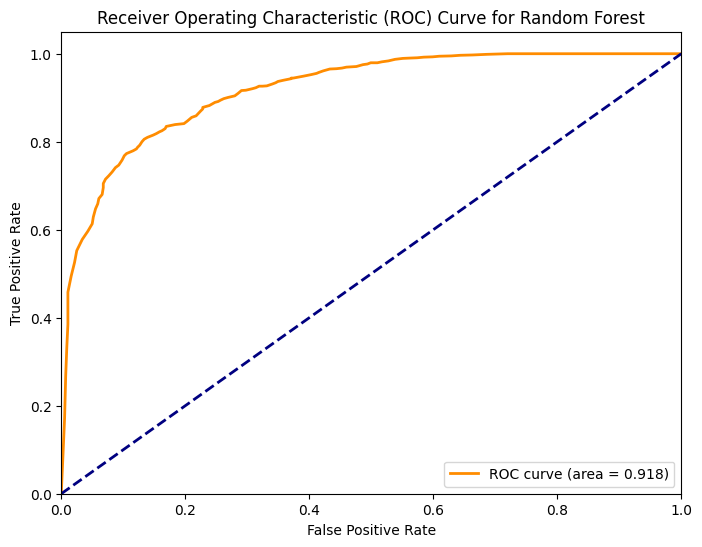

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve data for the Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred_probs)

# Calculate ROC AUC score for the Random Forest model
roc_auc_rf = roc_auc_score(y_test, rf_pred_probs)

# Plot ROC curve for the Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

## 5.3 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define classifiers and their respective parameter grids
# No hyperparameters to tune for Gaussian Naive Bayes
classifiers = {
    "Logistic Regression": (LogisticRegression(),
                            {
                                'C': [0.1, 1.0, 10.0],              # Regularization parameter
                                'penalty': ['l1', 'l2'],             # Regularization term
                                'solver': ['liblinear', 'saga'],     # Solver for optimization problem
                                'max_iter': np.random.randint(100, 1000, size=100)       # Maximum number of iterations
                            }),
    "Support Vector Machine": (SVC(),
                              {
                                  'C': [0.1, 1.0, 10.0],              # Regularization parameter
                                  'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel type
                                  'gamma': ['scale', 'auto'],         # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
                                  'probability': [True, False]        # Whether to enable probability estimates
                              }),
    "Decision Tree": (DecisionTreeClassifier(),
                      {
                          'max_depth': np.random.randint(10, 100, size=100),               # Maximum depth of the tree
                          'min_samples_split': np.random.randint(2, 20, size=100),         # Minimum number of samples required to split an internal node
                          'min_samples_leaf': np.random.randint(1, 20, size=100),          # Minimum number of samples required to be at a leaf node
                          'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider when looking for the best split
                      }),
    "Naive Bayes": (GaussianNB(),
                    {
                        # No hyperparameters to tune for Gaussian Naive Bayes
                    }),
     "Random Forest": (RandomForestClassifier(),
                      {
                          'n_estimators': np.random.randint(100, 1000, size=100),          # Number of trees in the forest
                          'max_depth': np.random.randint(10, 100, size=100),               # Maximum depth of the tree
                          'min_samples_split': np.random.randint(2, 20, size=100),         # Minimum number of samples required to split an internal node
                          'min_samples_leaf': np.random.randint(1, 20, size=100),          # Minimum number of samples required to be at a leaf node
                          'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider when looking for the best split
                          'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
                      })
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each classifier and perform hyperparameter tuning
for clf_name, (clf, param_grid) in classifiers.items():
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=skf, n_iter=100, verbose=1, n_jobs=-1)
    random_search.fit(X_train_resampled, y_train_resampled)

    print(f"{clf_name} Results:")
    print("Best Hyperparameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)
    print("\n")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

The hyperparameter tuning results demonstrate how each model performed after optimising its hyperparameters with RandomizedSearchCV. The `Best Score` is the mean cross-validated score of the best hyperparameters discovered during the tuning process. It provides an estimate of the model's performance when the optimised hyperparameters are used, which reflects how well they can generalise to new data.

**Key Takeaway**

Random Forest had the highest `ROC AUC score` in previous evaluation and achieved a good performance even after hyperparameter tuning, with a `best score` of 0.9065. It shows that Random Forest is robust and performed well both before and after tuning.

# 6. Model Deployment using Streamlit

### Saving Trained Model

In [ ]:
import joblib

# Saving trained Random Forest Classifier
joblib.dump(rf, 'trained_model.pkl')

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile newapp.py

import streamlit as st
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading trained model
loaded_model = joblib.load('trained_model.pkl')

# Define the layout for two columns
st.set_page_config(layout="wide")

# HTML code for custom title style
html_temp = """
    <div style="background-color:teal;padding:10px">
    <h1 style="color:white;text-align:center;">Customer Churn Prediction App </h1>
    </div>
    """

# Display the custom title
st.markdown(html_temp, unsafe_allow_html=True)

# Creating two columns
col1, col2 = st.columns([1, 1])

# Column 1 (Information)
with col1:
    st.title("Information")
    st.write("Customer churn, or customer attrition, refers to customers transitioning to a competitor or terminating their subscription with a business. In the telecommunications industry, understanding and managing customer churn is of paramount importance. By proactively addressing customer churn, telecommunications companies aim to enhance customer satisfaction, loyalty, and overall business success.")

    st.title("How It Works")
    st.write("1. Input Parameters: You provide specific information about a telecom customer by completing all parameters.")
    st.write("2. Machine Learning Model: Behind the scenes, a machine learning model processes the information you entered. This model has been trained to recognize patterns that indicate whether a customer is at a higher risk of churning or not.")
    st.write("3. Prediction: Once you click the 'Predict' button, the model uses the input parameters to make a prediction. It will tell you whether the customer is likely to leave the telecom service ('higher risk of churning') or not ('not at a high risk of churning').")
    st.write("4. Outcome: Based on the model's prediction, you will receive a clear and straightforward result, helping you understand the customer's churn risk.")

# Column 2 (User Input and Prediction)
with col2:
    # Create input elements for user input
    num_dependents = st.number_input("Number of Dependents", min_value=0, max_value=10, step=1)
    internet_service = st.selectbox("Internet Service", ["Yes", "No"])
    online_security = st.selectbox("Online Security", ["Yes", "No"])
    payment_method_credit_card = st.selectbox("Payment Method (Credit Card)", ["Yes", "No"])
    contract_month_to_month = st.selectbox("Contract (Month-to-Month)", ["Yes", "No"])
    contract_one_year = st.selectbox("Contract (One Year)", ["Yes", "No"])
    contract_two_year = st.selectbox("Contract (Two Year)", ["Yes", "No"])
    internet_type_fiber_optic = st.selectbox("Internet Type (Fiber Optic)", ["Yes", "No"])
    internet_type_none = st.selectbox("Internet Type (None)", ["Yes", "No"])
    offer_offer_e = st.selectbox("Offer (Offer E)", ["Yes", "No"])
    tenure_months = st.number_input("Tenure in Months", min_value=0, max_value=100, step=1)
    total_charges = st.number_input("Total Charges", min_value=0.0)
    total_revenue = st.number_input("Total Revenue", min_value=0.0)
    total_long_distance_charges = st.number_input("Total Long Distance Charges", min_value=0.0)
    num_referrals = st.number_input("Number of Referrals", min_value=0, max_value=20, step=1)

    # Creating a button to trigger the prediction
    if st.button("Predict"):
        # Preparing the input data for prediction
        input_data = pd.DataFrame({
            "Number of Dependents": [num_dependents],
            "Internet Service": [internet_service],
            "Online Security": [online_security],
            "Payment Method_Credit Card": [payment_method_credit_card],
            "Contract_Month-to-Month": [contract_month_to_month],
            "Contract_One Year": [contract_one_year],
            "Contract_Two Year": [contract_two_year],
            "Internet Type_Fiber Optic": [internet_type_fiber_optic],
            "Internet Type_None": [internet_type_none],
            "Offer_Offer E": [offer_offer_e],
            "Tenure in Months": [tenure_months],
            "Total Charges": [total_charges],
            "Total Revenue": [total_revenue],
            "Total Long Distance Charges": [total_long_distance_charges],
            "Number of Referrals": [num_referrals]
        })

        # Encoding 'Yes' as 1 and other values as 0 for Categorical features
        categorical_cols = ['Internet Service', 'Online Security', 'Payment Method_Credit Card', 'Contract_Month-to-Month',
                            'Contract_One Year', 'Contract_Two Year', 'Internet Type_Fiber Optic', 'Internet Type_None',
                            'Offer_Offer E']

        input_data[categorical_cols] = input_data[categorical_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

        # Scaling numerical features using StandardScaler
        numerical_cols = ['Tenure in Months', 'Total Charges', 'Total Revenue', 'Total Long Distance Charges', 'Number of Referrals']
        scaler = StandardScaler()
        input_data[numerical_cols] = scaler.fit_transform(input_data[numerical_cols])

        # Make predictions
        prediction = loaded_model.predict(input_data)

        # Display the prediction result
        if prediction[0] == 0:
            st.write("Customer is at a higher risk of churning")
        else:
            st.write("Customer is NOT at a high risk of churning")

In [ ]:
# Authentication token gotten from ngrok after signup
!ngrok config add-authtoken 2V36eSpNTvDnuV9zI9deXwODmsp_5SZNu4gskKnm3Y4MhYno

In [ ]:
# Downloading and saving ngrok in sandbox
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
# Unzipping ngrok
!unzip ngrok-stable-linux-amd64.zip

In [ ]:
# Creating a local tunnel for ngrok to host app.py
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
# The generated link should be used after running the streamlit app in the next code line
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
# Run Streamlit app.py
!streamlit run /content/newapp.py